In [2]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [3]:
def investigate_comp(comp, resdf):
    def avg_cols(df, cols):
        return df[cols].mean(axis=1)
    comp_list = list(range(0,resdf.shape[1]))
    comp_list.remove(comp)
    other_pts = avg_cols(resdf,comp_list)
    return resdf[comp] - other_pts
    

In [4]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [5]:
# 5% edges
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [6]:
sympdf.shape

(6031, 147)

In [7]:
# patient is a mixture of classes but it's meant to represent probs rather than actual multiple class labels
# so this model is less complex, but it might still be more appropriate, it'll depend

model = StepMix(n_components=9, measurement="binary", verbose=0, random_state=123)


In [8]:
model.fit(sympdf)


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.48s/it, max_LL=-4.1e+5, max_avg_LL=-68]


StepMix(measurement='binary', n_components=9, random_state=123)

In [15]:
grid = {
    'n_components': [ 2,3, 4,5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20],
}





In [16]:
dfs = []
for i in range(1,10):
    # select i*0.1 of the data columns
    for j in range(1,10):
        dfs.append(sympdf.sample(frac=i*0.1, axis=1, random_state=j))
dfs.append(sympdf)

In [17]:
len(dfs)

82

In [19]:
%%capture
results = dict(param_n_components=[], aic=[], bic=[], symp_frac=[], orig_index=[])

# Same model and grid as above
for g in ParameterGrid(grid):
    model.set_params(**g)
    for i in range(len(dfs)):
        print(i)
        model.fit(dfs[i])
        results['param_n_components'].append(g['n_components'])
        results['aic'].append(model.aic(dfs[i]))
        results['bic'].append(model.bic(dfs[i]))
        results['symp_frac'].append(dfs[i].shape[1] / sympdf.shape[1])
        results['orig_index'].append(i)

# Save results to a dataframe
results = pd.DataFrame(results)

0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 21.62it/s, max_LL=-4.82e+4, max_avg_LL=-7.99]


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 16.05it/s, max_LL=-4.36e+4, max_avg_LL=-7.22]


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 31.19it/s, max_LL=-5.16e+4, max_avg_LL=-8.56]


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 15.62it/s, max_LL=-4.51e+4, max_avg_LL=-7.47]


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 21.83it/s, max_LL=-4.65e+4, max_avg_LL=-7.71]


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 19.66it/s, max_LL=-4.4e+4, max_avg_LL=-7.3]


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 20.36it/s, max_LL=-4.33e+4, max_avg_LL=-7.19]


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 18.87it/s, max_LL=-4e+4, max_avg_LL=-6.63]


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 19.79it/s, max_LL=-4.36e+4, max_avg_LL=-7.23]


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.45it/s, max_LL=-9.42e+4, max_avg_LL=-15.6]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.80it/s, max_LL=-9.02e+4, max_avg_LL=-15]


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.75it/s, max_LL=-9.74e+4, max_avg_LL=-16.2]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.59it/s, max_LL=-8.16e+4, max_avg_LL=-13.5]


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  7.11it/s, max_LL=-8.91e+4, max_avg_LL=-14.8]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.78it/s, max_LL=-8.15e+4, max_avg_LL=-13.5]


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.89it/s, max_LL=-8.95e+4, max_avg_LL=-14.8]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.40it/s, max_LL=-7.66e+4, max_avg_LL=-12.7]


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.27it/s, max_LL=-8.54e+4, max_avg_LL=-14.2]

18


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.85it/s, max_LL=-1.34e+5, max_avg_LL=-22.3]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.26it/s, max_LL=-1.34e+5, max_avg_LL=-22.3]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.06it/s, max_LL=-1.46e+5, max_avg_LL=-24.2]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.86it/s, max_LL=-1.28e+5, max_avg_LL=-21.3]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.30it/s, max_LL=-1.31e+5, max_avg_LL=-21.8]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.54it/s, max_LL=-1.23e+5, max_avg_LL=-20.5]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.26it/s, max_LL=-1.36e+5, max_avg_LL=-22.5]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.38it/s, max_LL=-1.24e+5, max_avg_LL=-20.6]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.78it/s, max_LL=-1.28e+5, max_avg_LL=-21.2]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.05it/s, max_LL=-1.77e+5, max_avg_LL=-29.4]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  7.83it/s, max_LL=-1.73e+5, max_avg_LL=-28.7]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.68it/s, max_LL=-1.89e+5, max_avg_LL=-31.3]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.88it/s, max_LL=-1.77e+5, max_avg_LL=-29.3]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.03it/s, max_LL=-1.74e+5, max_avg_LL=-28.8]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.42it/s, max_LL=-1.66e+5, max_avg_LL=-27.4]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.61it/s, max_LL=-1.8e+5, max_avg_LL=-29.8]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.31it/s, max_LL=-1.7e+5, max_avg_LL=-28.1]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.36it/s, max_LL=-1.74e+5, max_avg_LL=-28.9]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.37it/s, max_LL=-2.19e+5, max_avg_LL=-36.4]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.54it/s, max_LL=-2.17e+5, max_avg_LL=-36]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  7.46it/s, max_LL=-2.28e+5, max_avg_LL=-37.8]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  7.69it/s, max_LL=-2.19e+5, max_avg_LL=-36.4]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.63it/s, max_LL=-2.18e+5, max_avg_LL=-36.1]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.84it/s, max_LL=-2.1e+5, max_avg_LL=-34.8]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.78it/s, max_LL=-2.21e+5, max_avg_LL=-36.6]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  7.22it/s, max_LL=-2.11e+5, max_avg_LL=-35]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.95it/s, max_LL=-2.23e+5, max_avg_LL=-36.9]

45


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.13it/s, max_LL=-2.61e+5, max_avg_LL=-43.3]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.00it/s, max_LL=-2.57e+5, max_avg_LL=-42.7]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.82it/s, max_LL=-2.64e+5, max_avg_LL=-43.8]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.76it/s, max_LL=-2.58e+5, max_avg_LL=-42.8]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  7.45it/s, max_LL=-2.61e+5, max_avg_LL=-43.3]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  7.24it/s, max_LL=-2.49e+5, max_avg_LL=-41.3]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.57it/s, max_LL=-2.61e+5, max_avg_LL=-43.3]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.97it/s, max_LL=-2.56e+5, max_avg_LL=-42.4]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.93it/s, max_LL=-2.66e+5, max_avg_LL=-44]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.99it/s, max_LL=-3.05e+5, max_avg_LL=-50.5]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.08it/s, max_LL=-2.99e+5, max_avg_LL=-49.6]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.10it/s, max_LL=-3.09e+5, max_avg_LL=-51.2]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.81it/s, max_LL=-3.02e+5, max_avg_LL=-50.1]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.90it/s, max_LL=-3.06e+5, max_avg_LL=-50.7]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.34it/s, max_LL=-2.96e+5, max_avg_LL=-49.1]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.63it/s, max_LL=-3.03e+5, max_avg_LL=-50.3]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.66it/s, max_LL=-3e+5, max_avg_LL=-49.7]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.06it/s, max_LL=-3.1e+5, max_avg_LL=-51.5]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.57it/s, max_LL=-3.47e+5, max_avg_LL=-57.6]

64


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.75it/s, max_LL=-3.46e+5, max_avg_LL=-57.4]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  7.93it/s, max_LL=-3.48e+5, max_avg_LL=-57.6]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.45it/s, max_LL=-3.48e+5, max_avg_LL=-57.7]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.74it/s, max_LL=-3.47e+5, max_avg_LL=-57.6]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.75it/s, max_LL=-3.42e+5, max_avg_LL=-56.7]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.22it/s, max_LL=-3.5e+5, max_avg_LL=-58]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.28it/s, max_LL=-3.45e+5, max_avg_LL=-57.1]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.32it/s, max_LL=-3.57e+5, max_avg_LL=-59.2]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.06it/s, max_LL=-3.92e+5, max_avg_LL=-64.9]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.10it/s, max_LL=-3.89e+5, max_avg_LL=-64.5]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.89it/s, max_LL=-3.87e+5, max_avg_LL=-64.2]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.15it/s, max_LL=-3.84e+5, max_avg_LL=-63.7]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.28it/s, max_LL=-3.88e+5, max_avg_LL=-64.3]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.80it/s, max_LL=-3.84e+5, max_avg_LL=-63.8]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.92it/s, max_LL=-3.85e+5, max_avg_LL=-63.9]

79


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.60it/s, max_LL=-3.84e+5, max_avg_LL=-63.7]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.39it/s, max_LL=-3.91e+5, max_avg_LL=-64.8]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.96it/s, max_LL=-4.31e+5, max_avg_LL=-71.5]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.79it/s, max_LL=-4.75e+4, max_avg_LL=-7.88]


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.15it/s, max_LL=-4.33e+4, max_avg_LL=-7.19]


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.74it/s, max_LL=-5.12e+4, max_avg_LL=-8.48]


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.39it/s, max_LL=-4.46e+4, max_avg_LL=-7.4]


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.21s/it, max_LL=-4.63e+4, max_avg_LL=-7.68]


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.21s/it, max_LL=-4.38e+4, max_avg_LL=-7.27]


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.32s/it, max_LL=-4.31e+4, max_avg_LL=-7.15]


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.89it/s, max_LL=-3.98e+4, max_avg_LL=-6.59]


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.76it/s, max_LL=-4.34e+4, max_avg_LL=-7.19]


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.19it/s, max_LL=-9.31e+4, max_avg_LL=-15.4]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.48it/s, max_LL=-8.93e+4, max_avg_LL=-14.8]


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.70it/s, max_LL=-9.6e+4, max_avg_LL=-15.9]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.94it/s, max_LL=-8.08e+4, max_avg_LL=-13.4]


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.02it/s, max_LL=-8.82e+4, max_avg_LL=-14.6]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.58it/s, max_LL=-8.06e+4, max_avg_LL=-13.4]


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.00it/s, max_LL=-8.75e+4, max_avg_LL=-14.5]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.09it/s, max_LL=-7.59e+4, max_avg_LL=-12.6]


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.00it/s, max_LL=-8.46e+4, max_avg_LL=-14]


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.17it/s, max_LL=-1.32e+5, max_avg_LL=-21.9]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.59it/s, max_LL=-1.32e+5, max_avg_LL=-22]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.31it/s, max_LL=-1.43e+5, max_avg_LL=-23.8]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.23it/s, max_LL=-1.26e+5, max_avg_LL=-21]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.97it/s, max_LL=-1.3e+5, max_avg_LL=-21.5]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.30it/s, max_LL=-1.22e+5, max_avg_LL=-20.2]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.37it/s, max_LL=-1.33e+5, max_avg_LL=-22.1]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.01s/it, max_LL=-1.23e+5, max_avg_LL=-20.3]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.61it/s, max_LL=-1.26e+5, max_avg_LL=-20.9]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.62it/s, max_LL=-1.74e+5, max_avg_LL=-28.9]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.58it/s, max_LL=-1.7e+5, max_avg_LL=-28.2]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.01it/s, max_LL=-1.86e+5, max_avg_LL=-30.8]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.95it/s, max_LL=-1.74e+5, max_avg_LL=-28.8]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.31it/s, max_LL=-1.71e+5, max_avg_LL=-28.3]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.14it/s, max_LL=-1.63e+5, max_avg_LL=-27]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.76it/s, max_LL=-1.76e+5, max_avg_LL=-29.2]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.52it/s, max_LL=-1.67e+5, max_avg_LL=-27.7]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.68it/s, max_LL=-1.71e+5, max_avg_LL=-28.4]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.98it/s, max_LL=-2.15e+5, max_avg_LL=-35.7]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.03it/s, max_LL=-2.14e+5, max_avg_LL=-35.4]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.99it/s, max_LL=-2.24e+5, max_avg_LL=-37.1]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.61it/s, max_LL=-2.15e+5, max_avg_LL=-35.7]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.48it/s, max_LL=-2.14e+5, max_avg_LL=-35.5]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.42it/s, max_LL=-2.06e+5, max_avg_LL=-34.2]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.37it/s, max_LL=-2.17e+5, max_avg_LL=-35.9]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.73it/s, max_LL=-2.07e+5, max_avg_LL=-34.4]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.29it/s, max_LL=-2.19e+5, max_avg_LL=-36.3]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.90it/s, max_LL=-2.57e+5, max_avg_LL=-42.6]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.04it/s, max_LL=-2.53e+5, max_avg_LL=-41.9]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.41it/s, max_LL=-2.59e+5, max_avg_LL=-43]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.55it/s, max_LL=-2.53e+5, max_avg_LL=-42]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.12it/s, max_LL=-2.56e+5, max_avg_LL=-42.5]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.49it/s, max_LL=-2.44e+5, max_avg_LL=-40.5]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  7.42it/s, max_LL=-2.56e+5, max_avg_LL=-42.4]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.36it/s, max_LL=-2.51e+5, max_avg_LL=-41.6]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.89it/s, max_LL=-2.61e+5, max_avg_LL=-43.3]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.93it/s, max_LL=-2.99e+5, max_avg_LL=-49.6]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.33it/s, max_LL=-2.93e+5, max_avg_LL=-48.7]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.16it/s, max_LL=-3.02e+5, max_avg_LL=-50.1]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.09it/s, max_LL=-2.96e+5, max_avg_LL=-49.1]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.08it/s, max_LL=-3e+5, max_avg_LL=-49.8]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.75it/s, max_LL=-2.91e+5, max_avg_LL=-48.2]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.85it/s, max_LL=-2.97e+5, max_avg_LL=-49.3]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.05it/s, max_LL=-2.94e+5, max_avg_LL=-48.8]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.99it/s, max_LL=-3.05e+5, max_avg_LL=-50.5]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.07it/s, max_LL=-3.41e+5, max_avg_LL=-56.5]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.76it/s, max_LL=-3.39e+5, max_avg_LL=-56.2]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.20it/s, max_LL=-3.4e+5, max_avg_LL=-56.5]

66
Fitting StepMix...



Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.85it/s, max_LL=-3.41e+5, max_avg_LL=-56.6]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.48it/s, max_LL=-3.41e+5, max_avg_LL=-56.5]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.72it/s, max_LL=-3.35e+5, max_avg_LL=-55.6]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.45it/s, max_LL=-3.43e+5, max_avg_LL=-56.9]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.95it/s, max_LL=-3.38e+5, max_avg_LL=-56.1]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.77it/s, max_LL=-3.5e+5, max_avg_LL=-58.1]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.29it/s, max_LL=-3.84e+5, max_avg_LL=-63.6]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.84it/s, max_LL=-3.81e+5, max_avg_LL=-63.2]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.70it/s, max_LL=-3.79e+5, max_avg_LL=-62.9]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.19it/s, max_LL=-3.77e+5, max_avg_LL=-62.5]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.89it/s, max_LL=-3.8e+5, max_avg_LL=-63.1]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.40it/s, max_LL=-3.77e+5, max_avg_LL=-62.5]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.66it/s, max_LL=-3.78e+5, max_avg_LL=-62.6]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.09it/s, max_LL=-3.77e+5, max_avg_LL=-62.4]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.28it/s, max_LL=-3.83e+5, max_avg_LL=-63.5]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.05it/s, max_LL=-4.22e+5, max_avg_LL=-70]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.87it/s, max_LL=-4.7e+4, max_avg_LL=-7.8]


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.56s/it, max_LL=-4.32e+4, max_avg_LL=-7.17]


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.96it/s, max_LL=-5.09e+4, max_avg_LL=-8.43]


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.36s/it, max_LL=-4.45e+4, max_avg_LL=-7.38]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, max_LL=-4.62e+4, max_avg_LL=-7.67]


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.23s/it, max_LL=-4.37e+4, max_avg_LL=-7.25]


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.38s/it, max_LL=-4.3e+4, max_avg_LL=-7.13]


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.12s/it, max_LL=-3.97e+4, max_avg_LL=-6.57]


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.27it/s, max_LL=-4.33e+4, max_avg_LL=-7.17]


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.21it/s, max_LL=-9.26e+4, max_avg_LL=-15.4]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.57it/s, max_LL=-8.9e+4, max_avg_LL=-14.8]


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.51it/s, max_LL=-9.5e+4, max_avg_LL=-15.8]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.99it/s, max_LL=-8.03e+4, max_avg_LL=-13.3]


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.81it/s, max_LL=-8.77e+4, max_avg_LL=-14.5]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.99it/s, max_LL=-7.99e+4, max_avg_LL=-13.2]


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.44it/s, max_LL=-8.65e+4, max_avg_LL=-14.3]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.20it/s, max_LL=-7.57e+4, max_avg_LL=-12.5]


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.92it/s, max_LL=-8.42e+4, max_avg_LL=-14]


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.57it/s, max_LL=-1.31e+5, max_avg_LL=-21.7]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.16it/s, max_LL=-1.32e+5, max_avg_LL=-21.8]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.84it/s, max_LL=-1.42e+5, max_avg_LL=-23.6]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.77it/s, max_LL=-1.25e+5, max_avg_LL=-20.7]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.30s/it, max_LL=-1.29e+5, max_avg_LL=-21.3]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.83it/s, max_LL=-1.21e+5, max_avg_LL=-20]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.94it/s, max_LL=-1.32e+5, max_avg_LL=-21.8]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.31s/it, max_LL=-1.22e+5, max_avg_LL=-20.2]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.04it/s, max_LL=-1.25e+5, max_avg_LL=-20.7]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.19it/s, max_LL=-1.73e+5, max_avg_LL=-28.6]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.24it/s, max_LL=-1.69e+5, max_avg_LL=-28]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.86it/s, max_LL=-1.84e+5, max_avg_LL=-30.5]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.82it/s, max_LL=-1.72e+5, max_avg_LL=-28.5]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.52s/it, max_LL=-1.7e+5, max_avg_LL=-28.2]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.43it/s, max_LL=-1.6e+5, max_avg_LL=-26.6]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.52s/it, max_LL=-1.75e+5, max_avg_LL=-29.1]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.37s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.36it/s, max_LL=-1.7e+5, max_avg_LL=-28.2]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.30it/s, max_LL=-2.14e+5, max_avg_LL=-35.4]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.70it/s, max_LL=-2.11e+5, max_avg_LL=-35.1]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.65it/s, max_LL=-2.22e+5, max_avg_LL=-36.8]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.61it/s, max_LL=-2.12e+5, max_avg_LL=-35.2]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.06s/it, max_LL=-2.13e+5, max_avg_LL=-35.3]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.62it/s, max_LL=-2.04e+5, max_avg_LL=-33.8]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.29it/s, max_LL=-2.14e+5, max_avg_LL=-35.5]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.56it/s, max_LL=-2.06e+5, max_avg_LL=-34.1]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.43it/s, max_LL=-2.17e+5, max_avg_LL=-36]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.11it/s, max_LL=-2.55e+5, max_avg_LL=-42.2]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.71it/s, max_LL=-2.5e+5, max_avg_LL=-41.5]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.71it/s, max_LL=-2.56e+5, max_avg_LL=-42.5]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.11it/s, max_LL=-2.5e+5, max_avg_LL=-41.5]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.62it/s, max_LL=-2.55e+5, max_avg_LL=-42.3]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.70it/s, max_LL=-2.42e+5, max_avg_LL=-40.1]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.94it/s, max_LL=-2.53e+5, max_avg_LL=-42]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.67it/s, max_LL=-2.49e+5, max_avg_LL=-41.3]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.77it/s, max_LL=-2.59e+5, max_avg_LL=-42.9]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.53it/s, max_LL=-2.97e+5, max_avg_LL=-49.2]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.85it/s, max_LL=-2.9e+5, max_avg_LL=-48.1]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.80it/s, max_LL=-2.99e+5, max_avg_LL=-49.5]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.17it/s, max_LL=-2.92e+5, max_avg_LL=-48.5]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.03it/s, max_LL=-2.98e+5, max_avg_LL=-49.3]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.29it/s, max_LL=-2.88e+5, max_avg_LL=-47.7]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.15it/s, max_LL=-2.94e+5, max_avg_LL=-48.7]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.61it/s, max_LL=-2.92e+5, max_avg_LL=-48.4]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.60it/s, max_LL=-3.02e+5, max_avg_LL=-50.1]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.32it/s, max_LL=-3.38e+5, max_avg_LL=-56]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.48it/s, max_LL=-3.36e+5, max_avg_LL=-55.7]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.15it/s, max_LL=-3.37e+5, max_avg_LL=-55.8]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.45it/s, max_LL=-3.37e+5, max_avg_LL=-55.9]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.78it/s, max_LL=-3.38e+5, max_avg_LL=-56]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.84it/s, max_LL=-3.32e+5, max_avg_LL=-55]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.12s/it, max_LL=-3.39e+5, max_avg_LL=-56.3]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.67it/s, max_LL=-3.35e+5, max_avg_LL=-55.6]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.47it/s, max_LL=-3.47e+5, max_avg_LL=-57.6]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.03it/s, max_LL=-3.8e+5, max_avg_LL=-63]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.01it/s, max_LL=-3.78e+5, max_avg_LL=-62.7]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.44it/s, max_LL=-3.75e+5, max_avg_LL=-62.2]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.01it/s, max_LL=-3.73e+5, max_avg_LL=-61.8]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.03it/s, max_LL=-3.77e+5, max_avg_LL=-62.5]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.38it/s, max_LL=-3.73e+5, max_avg_LL=-61.9]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.42it/s, max_LL=-3.74e+5, max_avg_LL=-62]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.58it/s, max_LL=-3.73e+5, max_avg_LL=-61.9]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.01it/s, max_LL=-3.79e+5, max_avg_LL=-62.8]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.04s/it, max_LL=-4.18e+5, max_avg_LL=-69.3]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.45s/it, max_LL=-4.69e+4, max_avg_LL=-7.78]


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.06s/it, max_LL=-4.31e+4, max_avg_LL=-7.15]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.01s/it, max_LL=-5.08e+4, max_avg_LL=-8.42]


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it, max_LL=-4.44e+4, max_avg_LL=-7.36]


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.55s/it, max_LL=-4.62e+4, max_avg_LL=-7.66]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it, max_LL=-4.37e+4, max_avg_LL=-7.24]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.93s/it, max_LL=-4.29e+4, max_avg_LL=-7.12]


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it, max_LL=-3.96e+4, max_avg_LL=-6.57]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it, max_LL=-4.32e+4, max_avg_LL=-7.17]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.21s/it, max_LL=-9.18e+4, max_avg_LL=-15.2]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it, max_LL=-8.87e+4, max_avg_LL=-14.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.10it/s, max_LL=-9.46e+4, max_avg_LL=-15.7]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.02it/s, max_LL=-8e+4, max_avg_LL=-13.3]


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it, max_LL=-8.75e+4, max_avg_LL=-14.5]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.19it/s, max_LL=-7.97e+4, max_avg_LL=-13.2]


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.37it/s, max_LL=-8.6e+4, max_avg_LL=-14.3]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.02it/s, max_LL=-7.54e+4, max_avg_LL=-12.5]


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.83s/it, max_LL=-8.39e+4, max_avg_LL=-13.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.60s/it, max_LL=-1.3e+5, max_avg_LL=-21.5]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.16it/s, max_LL=-1.31e+5, max_avg_LL=-21.7]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.91it/s, max_LL=-1.41e+5, max_avg_LL=-23.4]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.73it/s, max_LL=-1.24e+5, max_avg_LL=-20.5]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.49it/s, max_LL=-1.28e+5, max_avg_LL=-21.2]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.11it/s, max_LL=-1.2e+5, max_avg_LL=-19.9]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.62it/s, max_LL=-1.31e+5, max_avg_LL=-21.7]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.38it/s, max_LL=-1.21e+5, max_avg_LL=-20]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.00s/it, max_LL=-1.25e+5, max_avg_LL=-20.7]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.24it/s, max_LL=-1.72e+5, max_avg_LL=-28.5]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.73it/s, max_LL=-1.68e+5, max_avg_LL=-27.9]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.22it/s, max_LL=-1.83e+5, max_avg_LL=-30.3]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.87it/s, max_LL=-1.7e+5, max_avg_LL=-28.2]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.08s/it, max_LL=-1.69e+5, max_avg_LL=-28]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.53it/s, max_LL=-1.6e+5, max_avg_LL=-26.5]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.77it/s, max_LL=-1.74e+5, max_avg_LL=-28.8]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.27s/it, max_LL=-1.65e+5, max_avg_LL=-27.3]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.36it/s, max_LL=-1.69e+5, max_avg_LL=-28.1]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.00s/it, max_LL=-2.12e+5, max_avg_LL=-35.2]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.16it/s, max_LL=-2.1e+5, max_avg_LL=-34.9]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.30s/it, max_LL=-2.21e+5, max_avg_LL=-36.6]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.53it/s, max_LL=-2.11e+5, max_avg_LL=-35]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.34it/s, max_LL=-2.12e+5, max_avg_LL=-35.2]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.04it/s, max_LL=-2.03e+5, max_avg_LL=-33.6]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.14it/s, max_LL=-2.13e+5, max_avg_LL=-35.3]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.44it/s, max_LL=-2.05e+5, max_avg_LL=-33.9]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.64it/s, max_LL=-2.16e+5, max_avg_LL=-35.9]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.19it/s, max_LL=-2.53e+5, max_avg_LL=-42]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.30it/s, max_LL=-2.49e+5, max_avg_LL=-41.2]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.73it/s, max_LL=-2.55e+5, max_avg_LL=-42.3]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.38it/s, max_LL=-2.49e+5, max_avg_LL=-41.2]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.85it/s, max_LL=-2.54e+5, max_avg_LL=-42]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.10it/s, max_LL=-2.41e+5, max_avg_LL=-39.9]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.92it/s, max_LL=-2.52e+5, max_avg_LL=-41.8]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.24it/s, max_LL=-2.47e+5, max_avg_LL=-41]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.13it/s, max_LL=-2.58e+5, max_avg_LL=-42.7]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.22it/s, max_LL=-2.95e+5, max_avg_LL=-48.9]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.34it/s, max_LL=-2.89e+5, max_avg_LL=-47.8]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.62it/s, max_LL=-2.97e+5, max_avg_LL=-49.3]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.41it/s, max_LL=-2.91e+5, max_avg_LL=-48.2]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.54it/s, max_LL=-2.96e+5, max_avg_LL=-49.1]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.54it/s, max_LL=-2.86e+5, max_avg_LL=-47.5]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.10it/s, max_LL=-2.92e+5, max_avg_LL=-48.4]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.14it/s, max_LL=-2.9e+5, max_avg_LL=-48.1]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, max_LL=-3e+5, max_avg_LL=-49.8]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.26it/s, max_LL=-3.36e+5, max_avg_LL=-55.7]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.32s/it, max_LL=-3.34e+5, max_avg_LL=-55.3]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.88it/s, max_LL=-3.35e+5, max_avg_LL=-55.5]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.24s/it, max_LL=-3.35e+5, max_avg_LL=-55.6]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.39it/s, max_LL=-3.36e+5, max_avg_LL=-55.7]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.94it/s, max_LL=-3.3e+5, max_avg_LL=-54.7]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.00it/s, max_LL=-3.37e+5, max_avg_LL=-55.9]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.49it/s, max_LL=-3.33e+5, max_avg_LL=-55.2]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.02s/it, max_LL=-3.45e+5, max_avg_LL=-57.2]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.25it/s, max_LL=-3.77e+5, max_avg_LL=-62.6]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.47it/s, max_LL=-3.75e+5, max_avg_LL=-62.2]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.83it/s, max_LL=-3.73e+5, max_avg_LL=-61.8]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.00s/it, max_LL=-3.7e+5, max_avg_LL=-61.4]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.58it/s, max_LL=-3.74e+5, max_avg_LL=-62.1]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.14it/s, max_LL=-3.71e+5, max_avg_LL=-61.5]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.51it/s, max_LL=-3.71e+5, max_avg_LL=-61.6]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.68it/s, max_LL=-3.71e+5, max_avg_LL=-61.5]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it, max_LL=-3.76e+5, max_avg_LL=-62.4]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.26it/s, max_LL=-4.15e+5, max_avg_LL=-68.9]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.11s/it, max_LL=-4.68e+4, max_avg_LL=-7.76]


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.32s/it, max_LL=-4.31e+4, max_avg_LL=-7.15]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, max_LL=-5.07e+4, max_avg_LL=-8.4]


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.17s/it, max_LL=-4.43e+4, max_avg_LL=-7.35]


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.57s/it, max_LL=-4.61e+4, max_avg_LL=-7.65]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.45s/it, max_LL=-4.36e+4, max_avg_LL=-7.23]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.32s/it, max_LL=-4.29e+4, max_avg_LL=-7.11]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.20s/it, max_LL=-3.96e+4, max_avg_LL=-6.56]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.23s/it, max_LL=-4.32e+4, max_avg_LL=-7.16]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.07s/it, max_LL=-9.13e+4, max_avg_LL=-15.1]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.21s/it, max_LL=-8.86e+4, max_avg_LL=-14.7]


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.44it/s, max_LL=-9.43e+4, max_avg_LL=-15.6]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.45it/s, max_LL=-7.98e+4, max_avg_LL=-13.2]


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.14it/s, max_LL=-8.73e+4, max_avg_LL=-14.5]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.28it/s, max_LL=-7.95e+4, max_avg_LL=-13.2]


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.14it/s, max_LL=-8.58e+4, max_avg_LL=-14.2]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.53it/s, max_LL=-7.53e+4, max_avg_LL=-12.5]


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.18it/s, max_LL=-8.37e+4, max_avg_LL=-13.9]


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.30it/s, max_LL=-1.29e+5, max_avg_LL=-21.5]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.81it/s, max_LL=-1.31e+5, max_avg_LL=-21.7]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.31it/s, max_LL=-1.41e+5, max_avg_LL=-23.3]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.00s/it, max_LL=-1.23e+5, max_avg_LL=-20.5]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.23it/s, max_LL=-1.28e+5, max_avg_LL=-21.2]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.84it/s, max_LL=-1.2e+5, max_avg_LL=-19.9]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.61it/s, max_LL=-1.31e+5, max_avg_LL=-21.6]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.49s/it, max_LL=-1.2e+5, max_avg_LL=-19.9]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, max_LL=-1.24e+5, max_avg_LL=-20.6]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.28it/s, max_LL=-1.71e+5, max_avg_LL=-28.4]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.03s/it, max_LL=-1.68e+5, max_avg_LL=-27.8]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.34s/it, max_LL=-1.82e+5, max_avg_LL=-30.1]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.32it/s, max_LL=-1.7e+5, max_avg_LL=-28.2]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.39s/it, max_LL=-1.68e+5, max_avg_LL=-27.9]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.90it/s, max_LL=-1.59e+5, max_avg_LL=-26.4]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.34it/s, max_LL=-1.73e+5, max_avg_LL=-28.7]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.59it/s, max_LL=-1.64e+5, max_avg_LL=-27.2]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.07s/it, max_LL=-1.69e+5, max_avg_LL=-28]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.19s/it, max_LL=-2.12e+5, max_avg_LL=-35.1]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.26it/s, max_LL=-2.09e+5, max_avg_LL=-34.7]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.95s/it, max_LL=-2.2e+5, max_avg_LL=-36.5]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.90it/s, max_LL=-2.1e+5, max_avg_LL=-34.8]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.17it/s, max_LL=-2.11e+5, max_avg_LL=-35]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.49it/s, max_LL=-2.02e+5, max_avg_LL=-33.5]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.14s/it, max_LL=-2.12e+5, max_avg_LL=-35.1]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.03it/s, max_LL=-2.04e+5, max_avg_LL=-33.8]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.40s/it, max_LL=-2.16e+5, max_avg_LL=-35.7]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.26s/it, max_LL=-2.52e+5, max_avg_LL=-41.8]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.23s/it, max_LL=-2.47e+5, max_avg_LL=-41]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.05it/s, max_LL=-2.54e+5, max_avg_LL=-42.1]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it, max_LL=-2.48e+5, max_avg_LL=-41.1]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.90s/it, max_LL=-2.53e+5, max_avg_LL=-41.9]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.43it/s, max_LL=-2.39e+5, max_avg_LL=-39.7]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.06it/s, max_LL=-2.51e+5, max_avg_LL=-41.5]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.45it/s, max_LL=-2.46e+5, max_avg_LL=-40.9]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it, max_LL=-2.57e+5, max_avg_LL=-42.6]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it, max_LL=-2.94e+5, max_avg_LL=-48.7]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.35s/it, max_LL=-2.87e+5, max_avg_LL=-47.6]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, max_LL=-2.96e+5, max_avg_LL=-49]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it, max_LL=-2.89e+5, max_avg_LL=-48]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.47it/s, max_LL=-2.95e+5, max_avg_LL=-48.9]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.11it/s, max_LL=-2.85e+5, max_avg_LL=-47.2]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.57s/it, max_LL=-2.91e+5, max_avg_LL=-48.2]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.55s/it, max_LL=-2.89e+5, max_avg_LL=-47.9]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it, max_LL=-2.99e+5, max_avg_LL=-49.5]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.54s/it, max_LL=-3.34e+5, max_avg_LL=-55.4]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.10s/it, max_LL=-3.32e+5, max_avg_LL=-55.1]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.98s/it, max_LL=-3.33e+5, max_avg_LL=-55.2]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.75s/it, max_LL=-3.34e+5, max_avg_LL=-55.3]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.97s/it, max_LL=-3.35e+5, max_avg_LL=-55.5]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.96s/it, max_LL=-3.28e+5, max_avg_LL=-54.4]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.81s/it, max_LL=-3.36e+5, max_avg_LL=-55.8]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.15s/it, max_LL=-3.32e+5, max_avg_LL=-55]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.09s/it, max_LL=-3.44e+5, max_avg_LL=-57]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.98s/it, max_LL=-3.76e+5, max_avg_LL=-62.3]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it, max_LL=-3.74e+5, max_avg_LL=-62]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.99s/it, max_LL=-3.71e+5, max_avg_LL=-61.6]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.81s/it, max_LL=-3.69e+5, max_avg_LL=-61.1]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, max_LL=-3.73e+5, max_avg_LL=-61.8]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.33s/it, max_LL=-3.69e+5, max_avg_LL=-61.2]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.52s/it, max_LL=-3.7e+5, max_avg_LL=-61.3]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, max_LL=-3.69e+5, max_avg_LL=-61.2]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.05it/s, max_LL=-3.75e+5, max_avg_LL=-62.1]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.49s/it, max_LL=-4.13e+5, max_avg_LL=-68.6]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.44s/it, max_LL=-4.67e+4, max_avg_LL=-7.75]


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it, max_LL=-4.31e+4, max_avg_LL=-7.14]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it, max_LL=-5.06e+4, max_avg_LL=-8.38]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.98s/it, max_LL=-4.43e+4, max_avg_LL=-7.35]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it, max_LL=-4.61e+4, max_avg_LL=-7.65]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it, max_LL=-4.36e+4, max_avg_LL=-7.23]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it, max_LL=-4.28e+4, max_avg_LL=-7.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.44s/it, max_LL=-3.95e+4, max_avg_LL=-6.56]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it, max_LL=-4.32e+4, max_avg_LL=-7.16]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it, max_LL=-9.11e+4, max_avg_LL=-15.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it, max_LL=-8.84e+4, max_avg_LL=-14.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.14s/it, max_LL=-9.41e+4, max_avg_LL=-15.6]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.98s/it, max_LL=-7.96e+4, max_avg_LL=-13.2]


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.33s/it, max_LL=-8.72e+4, max_avg_LL=-14.5]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.13s/it, max_LL=-7.94e+4, max_avg_LL=-13.2]


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.42s/it, max_LL=-8.57e+4, max_avg_LL=-14.2]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.19s/it, max_LL=-7.52e+4, max_avg_LL=-12.5]


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, max_LL=-8.36e+4, max_avg_LL=-13.9]


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.04it/s, max_LL=-1.29e+5, max_avg_LL=-21.4]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.44it/s, max_LL=-1.3e+5, max_avg_LL=-21.6]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.39it/s, max_LL=-1.4e+5, max_avg_LL=-23.3]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it, max_LL=-1.23e+5, max_avg_LL=-20.4]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.98s/it, max_LL=-1.27e+5, max_avg_LL=-21.1]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, max_LL=-1.2e+5, max_avg_LL=-19.9]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.05s/it, max_LL=-1.3e+5, max_avg_LL=-21.6]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.46s/it, max_LL=-1.2e+5, max_avg_LL=-19.9]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it, max_LL=-1.24e+5, max_avg_LL=-20.6]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.72s/it, max_LL=-1.71e+5, max_avg_LL=-28.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.29it/s, max_LL=-1.67e+5, max_avg_LL=-27.7]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.08it/s, max_LL=-1.81e+5, max_avg_LL=-30]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.27s/it, max_LL=-1.69e+5, max_avg_LL=-28]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.18s/it, max_LL=-1.68e+5, max_avg_LL=-27.9]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.52it/s, max_LL=-1.58e+5, max_avg_LL=-26.3]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.55it/s, max_LL=-1.72e+5, max_avg_LL=-28.6]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.95s/it, max_LL=-1.64e+5, max_avg_LL=-27.1]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it, max_LL=-1.68e+5, max_avg_LL=-27.9]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it, max_LL=-2.11e+5, max_avg_LL=-35]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it, max_LL=-2.09e+5, max_avg_LL=-34.6]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.73it/s, max_LL=-2.19e+5, max_avg_LL=-36.3]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.44s/it, max_LL=-2.09e+5, max_avg_LL=-34.7]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.89s/it, max_LL=-2.11e+5, max_avg_LL=-35]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.43s/it, max_LL=-2.01e+5, max_avg_LL=-33.4]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.31s/it, max_LL=-2.11e+5, max_avg_LL=-35]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.34s/it, max_LL=-2.03e+5, max_avg_LL=-33.7]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.38s/it, max_LL=-2.15e+5, max_avg_LL=-35.7]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.20s/it, max_LL=-2.51e+5, max_avg_LL=-41.7]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.24s/it, max_LL=-2.47e+5, max_avg_LL=-40.9]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.09s/it, max_LL=-2.53e+5, max_avg_LL=-41.9]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.36s/it, max_LL=-2.47e+5, max_avg_LL=-40.9]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.38s/it, max_LL=-2.52e+5, max_avg_LL=-41.8]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.31it/s, max_LL=-2.39e+5, max_avg_LL=-39.6]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it, max_LL=-2.5e+5, max_avg_LL=-41.4]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.25s/it, max_LL=-2.46e+5, max_avg_LL=-40.8]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.39s/it, max_LL=-2.56e+5, max_avg_LL=-42.4]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.56s/it, max_LL=-2.92e+5, max_avg_LL=-48.5]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.01it/s, max_LL=-2.86e+5, max_avg_LL=-47.5]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.37s/it, max_LL=-2.95e+5, max_avg_LL=-48.9]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it, max_LL=-2.88e+5, max_avg_LL=-47.8]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.15s/it, max_LL=-2.94e+5, max_avg_LL=-48.8]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.18s/it, max_LL=-2.84e+5, max_avg_LL=-47.1]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.19s/it, max_LL=-2.9e+5, max_avg_LL=-48.1]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.33it/s, max_LL=-2.88e+5, max_avg_LL=-47.7]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.29s/it, max_LL=-2.98e+5, max_avg_LL=-49.4]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.09s/it, max_LL=-3.33e+5, max_avg_LL=-55.3]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.47s/it, max_LL=-3.31e+5, max_avg_LL=-54.9]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.54s/it, max_LL=-3.32e+5, max_avg_LL=-55]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, max_LL=-3.32e+5, max_avg_LL=-55.1]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it, max_LL=-3.34e+5, max_avg_LL=-55.3]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.13s/it, max_LL=-3.27e+5, max_avg_LL=-54.3]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.12s/it, max_LL=-3.35e+5, max_avg_LL=-55.5]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.56s/it, max_LL=-3.31e+5, max_avg_LL=-54.9]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.47s/it, max_LL=-3.43e+5, max_avg_LL=-56.8]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.04it/s, max_LL=-3.74e+5, max_avg_LL=-62.1]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.24s/it, max_LL=-3.73e+5, max_avg_LL=-61.8]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.12it/s, max_LL=-3.7e+5, max_avg_LL=-61.3]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.05s/it, max_LL=-3.67e+5, max_avg_LL=-60.9]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.34it/s, max_LL=-3.72e+5, max_avg_LL=-61.6]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.08s/it, max_LL=-3.69e+5, max_avg_LL=-61.1]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.17it/s, max_LL=-3.68e+5, max_avg_LL=-61]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.10s/it, max_LL=-3.68e+5, max_avg_LL=-61]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.51s/it, max_LL=-3.74e+5, max_avg_LL=-61.9]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.07it/s, max_LL=-4.12e+5, max_avg_LL=-68.3]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.00s/it, max_LL=-4.67e+4, max_avg_LL=-7.74]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.95s/it, max_LL=-4.3e+4, max_avg_LL=-7.14]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.20s/it, max_LL=-5.05e+4, max_avg_LL=-8.37]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.64s/it, max_LL=-4.43e+4, max_avg_LL=-7.34]


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.39s/it, max_LL=-4.61e+4, max_avg_LL=-7.64]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.59s/it, max_LL=-4.36e+4, max_avg_LL=-7.23]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.33s/it, max_LL=-4.28e+4, max_avg_LL=-7.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.87s/it, max_LL=-3.95e+4, max_avg_LL=-6.55]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it, max_LL=-4.31e+4, max_avg_LL=-7.15]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.76s/it, max_LL=-9.08e+4, max_avg_LL=-15.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it, max_LL=-8.83e+4, max_avg_LL=-14.6]


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.98s/it, max_LL=-9.4e+4, max_avg_LL=-15.6]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.21s/it, max_LL=-7.96e+4, max_avg_LL=-13.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it, max_LL=-8.7e+4, max_avg_LL=-14.4]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.62s/it, max_LL=-7.93e+4, max_avg_LL=-13.1]


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.38s/it, max_LL=-8.56e+4, max_avg_LL=-14.2]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it, max_LL=-7.49e+4, max_avg_LL=-12.4]


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.38s/it, max_LL=-8.35e+4, max_avg_LL=-13.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.38s/it, max_LL=-1.28e+5, max_avg_LL=-21.3]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.26s/it, max_LL=-1.3e+5, max_avg_LL=-21.6]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.10s/it, max_LL=-1.4e+5, max_avg_LL=-23.2]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.15s/it, max_LL=-1.23e+5, max_avg_LL=-20.3]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it, max_LL=-1.27e+5, max_avg_LL=-21.1]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, max_LL=-1.19e+5, max_avg_LL=-19.8]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.69s/it, max_LL=-1.3e+5, max_avg_LL=-21.5]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.88s/it, max_LL=-1.2e+5, max_avg_LL=-19.8]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.06s/it, max_LL=-1.24e+5, max_avg_LL=-20.5]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.76s/it, max_LL=-1.7e+5, max_avg_LL=-28.2]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.16s/it, max_LL=-1.67e+5, max_avg_LL=-27.6]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.02s/it, max_LL=-1.8e+5, max_avg_LL=-29.9]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.77s/it, max_LL=-1.69e+5, max_avg_LL=-28]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.97s/it, max_LL=-1.68e+5, max_avg_LL=-27.8]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.73s/it, max_LL=-1.58e+5, max_avg_LL=-26.2]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.39s/it, max_LL=-1.72e+5, max_avg_LL=-28.5]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.93s/it, max_LL=-1.63e+5, max_avg_LL=-27.1]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.51s/it, max_LL=-1.68e+5, max_avg_LL=-27.8]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.80s/it, max_LL=-2.1e+5, max_avg_LL=-34.9]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.94s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.03it/s, max_LL=-2.18e+5, max_avg_LL=-36.2]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.49s/it, max_LL=-2.09e+5, max_avg_LL=-34.6]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.75s/it, max_LL=-2.1e+5, max_avg_LL=-34.9]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.45s/it, max_LL=-2.01e+5, max_avg_LL=-33.3]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.11it/s, max_LL=-2.1e+5, max_avg_LL=-34.9]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it, max_LL=-2.03e+5, max_avg_LL=-33.6]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.94s/it, max_LL=-2.14e+5, max_avg_LL=-35.6]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it, max_LL=-2.5e+5, max_avg_LL=-41.5]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.53s/it, max_LL=-2.46e+5, max_avg_LL=-40.8]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.69s/it, max_LL=-2.52e+5, max_avg_LL=-41.8]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.21s/it, max_LL=-2.46e+5, max_avg_LL=-40.8]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.90s/it, max_LL=-2.52e+5, max_avg_LL=-41.7]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.42s/it, max_LL=-2.38e+5, max_avg_LL=-39.5]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.05s/it, max_LL=-2.49e+5, max_avg_LL=-41.2]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.11s/it, max_LL=-2.45e+5, max_avg_LL=-40.7]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.62s/it, max_LL=-2.56e+5, max_avg_LL=-42.4]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.41s/it, max_LL=-2.92e+5, max_avg_LL=-48.4]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.30s/it, max_LL=-2.86e+5, max_avg_LL=-47.3]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.57s/it, max_LL=-2.94e+5, max_avg_LL=-48.7]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.34s/it, max_LL=-2.87e+5, max_avg_LL=-47.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.43s/it, max_LL=-2.94e+5, max_avg_LL=-48.7]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.34s/it, max_LL=-2.83e+5, max_avg_LL=-47]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.38s/it, max_LL=-2.89e+5, max_avg_LL=-47.8]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.49s/it, max_LL=-2.87e+5, max_avg_LL=-47.6]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.56s/it, max_LL=-2.97e+5, max_avg_LL=-49.3]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.18s/it, max_LL=-3.32e+5, max_avg_LL=-55.1]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it, max_LL=-3.3e+5, max_avg_LL=-54.8]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.71s/it, max_LL=-3.31e+5, max_avg_LL=-54.9]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it, max_LL=-3.32e+5, max_avg_LL=-55]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it, max_LL=-3.33e+5, max_avg_LL=-55.2]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.92s/it, max_LL=-3.27e+5, max_avg_LL=-54.1]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.39s/it, max_LL=-3.34e+5, max_avg_LL=-55.3]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.22s/it, max_LL=-3.3e+5, max_avg_LL=-54.7]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.22s/it, max_LL=-3.42e+5, max_avg_LL=-56.7]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.21s/it, max_LL=-3.73e+5, max_avg_LL=-61.9]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.48s/it, max_LL=-3.72e+5, max_avg_LL=-61.7]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.03s/it, max_LL=-3.69e+5, max_avg_LL=-61.1]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it, max_LL=-3.67e+5, max_avg_LL=-60.8]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.40s/it, max_LL=-3.7e+5, max_avg_LL=-61.4]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.28s/it, max_LL=-3.67e+5, max_avg_LL=-60.9]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.35s/it, max_LL=-3.67e+5, max_avg_LL=-60.9]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.77s/it, max_LL=-3.67e+5, max_avg_LL=-60.9]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it, max_LL=-3.73e+5, max_avg_LL=-61.8]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it, max_LL=-4.11e+5, max_avg_LL=-68.2]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.87s/it, max_LL=-4.66e+4, max_avg_LL=-7.73]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.43s/it, max_LL=-4.3e+4, max_avg_LL=-7.13]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.72s/it, max_LL=-5.05e+4, max_avg_LL=-8.37]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.89s/it, max_LL=-4.43e+4, max_avg_LL=-7.34]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it, max_LL=-4.61e+4, max_avg_LL=-7.64]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it, max_LL=-4.36e+4, max_avg_LL=-7.22]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it, max_LL=-4.28e+4, max_avg_LL=-7.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it, max_LL=-3.95e+4, max_avg_LL=-6.55]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it, max_LL=-4.31e+4, max_avg_LL=-7.15]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.33it/s, max_LL=-9.07e+4, max_avg_LL=-15]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it, max_LL=-8.81e+4, max_avg_LL=-14.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.46s/it, max_LL=-9.38e+4, max_avg_LL=-15.6]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it, max_LL=-7.95e+4, max_avg_LL=-13.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.56s/it, max_LL=-8.69e+4, max_avg_LL=-14.4]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it, max_LL=-7.92e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.14s/it, max_LL=-8.55e+4, max_avg_LL=-14.2]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it, max_LL=-7.48e+4, max_avg_LL=-12.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it, max_LL=-8.34e+4, max_avg_LL=-13.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it, max_LL=-1.28e+5, max_avg_LL=-21.3]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, max_LL=-1.3e+5, max_avg_LL=-21.5]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it, max_LL=-1.4e+5, max_avg_LL=-23.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.25s/it, max_LL=-1.22e+5, max_avg_LL=-20.3]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.50s/it, max_LL=-1.27e+5, max_avg_LL=-21]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.12s/it, max_LL=-1.19e+5, max_avg_LL=-19.8]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.21it/s, max_LL=-1.29e+5, max_avg_LL=-21.5]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.94s/it, max_LL=-1.2e+5, max_avg_LL=-19.8]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, max_LL=-1.24e+5, max_avg_LL=-20.5]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.32s/it, max_LL=-1.7e+5, max_avg_LL=-28.2]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.38s/it, max_LL=-1.66e+5, max_avg_LL=-27.6]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.76it/s, max_LL=-1.8e+5, max_avg_LL=-29.9]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.16s/it, max_LL=-1.68e+5, max_avg_LL=-27.9]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.18it/s, max_LL=-1.67e+5, max_avg_LL=-27.7]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.36it/s, max_LL=-1.58e+5, max_avg_LL=-26.2]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.20s/it, max_LL=-1.71e+5, max_avg_LL=-28.4]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.13it/s, max_LL=-1.63e+5, max_avg_LL=-27]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.17it/s, max_LL=-1.68e+5, max_avg_LL=-27.8]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it, max_LL=-2.1e+5, max_avg_LL=-34.8]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.14s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.36s/it, max_LL=-2.18e+5, max_avg_LL=-36.1]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.21it/s, max_LL=-2.08e+5, max_avg_LL=-34.5]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it, max_LL=-2.1e+5, max_avg_LL=-34.8]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.01it/s, max_LL=-2.01e+5, max_avg_LL=-33.3]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.53s/it, max_LL=-2.1e+5, max_avg_LL=-34.8]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.18s/it, max_LL=-2.02e+5, max_avg_LL=-33.5]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it, max_LL=-2.14e+5, max_avg_LL=-35.5]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.36s/it, max_LL=-2.5e+5, max_avg_LL=-41.4]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.84s/it, max_LL=-2.46e+5, max_avg_LL=-40.7]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.72s/it, max_LL=-2.52e+5, max_avg_LL=-41.7]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it, max_LL=-2.46e+5, max_avg_LL=-40.7]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.71s/it, max_LL=-2.51e+5, max_avg_LL=-41.6]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.21s/it, max_LL=-2.38e+5, max_avg_LL=-39.4]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.68s/it, max_LL=-2.48e+5, max_avg_LL=-41.1]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.28s/it, max_LL=-2.45e+5, max_avg_LL=-40.6]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.10s/it, max_LL=-2.55e+5, max_avg_LL=-42.3]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it, max_LL=-2.91e+5, max_avg_LL=-48.3]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it, max_LL=-2.85e+5, max_avg_LL=-47.3]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.06s/it, max_LL=-2.93e+5, max_avg_LL=-48.6]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it, max_LL=-2.87e+5, max_avg_LL=-47.5]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.98s/it, max_LL=-2.93e+5, max_avg_LL=-48.6]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.75s/it, max_LL=-2.83e+5, max_avg_LL=-46.9]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it, max_LL=-2.88e+5, max_avg_LL=-47.7]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.67s/it, max_LL=-2.86e+5, max_avg_LL=-47.5]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.10s/it, max_LL=-2.96e+5, max_avg_LL=-49.2]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.59s/it, max_LL=-3.32e+5, max_avg_LL=-55]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.21s/it, max_LL=-3.3e+5, max_avg_LL=-54.7]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.96s/it, max_LL=-3.3e+5, max_avg_LL=-54.7]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.59s/it, max_LL=-3.31e+5, max_avg_LL=-54.9]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.31s/it, max_LL=-3.32e+5, max_avg_LL=-55.1]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.56s/it, max_LL=-3.26e+5, max_avg_LL=-54]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.32s/it, max_LL=-3.33e+5, max_avg_LL=-55.2]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.16s/it, max_LL=-3.29e+5, max_avg_LL=-54.6]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.11s/it, max_LL=-3.41e+5, max_avg_LL=-56.5]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.36s/it, max_LL=-3.72e+5, max_avg_LL=-61.7]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.87s/it, max_LL=-3.71e+5, max_avg_LL=-61.5]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.32s/it, max_LL=-3.68e+5, max_avg_LL=-61]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.70s/it, max_LL=-3.66e+5, max_avg_LL=-60.6]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.25s/it, max_LL=-3.7e+5, max_avg_LL=-61.3]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.77s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.44s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.48s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.91s/it, max_LL=-3.72e+5, max_avg_LL=-61.7]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.28s/it, max_LL=-4.1e+5, max_avg_LL=-68]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.47s/it, max_LL=-4.66e+4, max_avg_LL=-7.73]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.42s/it, max_LL=-4.3e+4, max_avg_LL=-7.13]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.90s/it, max_LL=-5.04e+4, max_avg_LL=-8.36]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.56s/it, max_LL=-4.42e+4, max_avg_LL=-7.33]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.51s/it, max_LL=-4.61e+4, max_avg_LL=-7.64]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.10s/it, max_LL=-4.35e+4, max_avg_LL=-7.22]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.09s/it, max_LL=-4.28e+4, max_avg_LL=-7.09]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.68s/it, max_LL=-3.95e+4, max_avg_LL=-6.54]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.52s/it, max_LL=-4.31e+4, max_avg_LL=-7.15]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.38s/it, max_LL=-9.04e+4, max_avg_LL=-15]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.09s/it, max_LL=-8.81e+4, max_avg_LL=-14.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.27s/it, max_LL=-9.37e+4, max_avg_LL=-15.5]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it, max_LL=-7.94e+4, max_avg_LL=-13.2]


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it, max_LL=-8.68e+4, max_avg_LL=-14.4]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.67s/it, max_LL=-7.91e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.33s/it, max_LL=-8.54e+4, max_avg_LL=-14.2]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.12s/it, max_LL=-7.48e+4, max_avg_LL=-12.4]


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.72s/it, max_LL=-8.33e+4, max_avg_LL=-13.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.18s/it, max_LL=-1.28e+5, max_avg_LL=-21.2]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.51s/it, max_LL=-1.3e+5, max_avg_LL=-21.5]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.75s/it, max_LL=-1.4e+5, max_avg_LL=-23.1]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.23s/it, max_LL=-1.22e+5, max_avg_LL=-20.2]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.53s/it, max_LL=-1.27e+5, max_avg_LL=-21]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.82s/it, max_LL=-1.19e+5, max_avg_LL=-19.7]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.09s/it, max_LL=-1.29e+5, max_avg_LL=-21.4]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.85s/it, max_LL=-1.19e+5, max_avg_LL=-19.8]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.66s/it, max_LL=-1.23e+5, max_avg_LL=-20.5]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.34s/it, max_LL=-1.69e+5, max_avg_LL=-28.1]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.33s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.23s/it, max_LL=-1.8e+5, max_avg_LL=-29.8]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.04s/it, max_LL=-1.68e+5, max_avg_LL=-27.8]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.04s/it, max_LL=-1.67e+5, max_avg_LL=-27.7]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.00s/it, max_LL=-1.58e+5, max_avg_LL=-26.1]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it, max_LL=-1.71e+5, max_avg_LL=-28.4]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.22s/it, max_LL=-1.62e+5, max_avg_LL=-26.9]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it, max_LL=-1.67e+5, max_avg_LL=-27.7]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.24s/it, max_LL=-2.1e+5, max_avg_LL=-34.7]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.83s/it, max_LL=-2.07e+5, max_avg_LL=-34.4]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.05s/it, max_LL=-2.17e+5, max_avg_LL=-36.1]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.86s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it, max_LL=-2.09e+5, max_avg_LL=-34.7]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.14s/it, max_LL=-2e+5, max_avg_LL=-33.2]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.26s/it, max_LL=-2.09e+5, max_avg_LL=-34.7]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it, max_LL=-2.02e+5, max_avg_LL=-33.5]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.53s/it, max_LL=-2.14e+5, max_avg_LL=-35.4]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.74s/it, max_LL=-2.49e+5, max_avg_LL=-41.3]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.70s/it, max_LL=-2.45e+5, max_avg_LL=-40.6]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, max_LL=-2.51e+5, max_avg_LL=-41.6]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.31s/it, max_LL=-2.45e+5, max_avg_LL=-40.6]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.89s/it, max_LL=-2.51e+5, max_avg_LL=-41.5]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it, max_LL=-2.37e+5, max_avg_LL=-39.4]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.33s/it, max_LL=-2.48e+5, max_avg_LL=-41]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.52s/it, max_LL=-2.44e+5, max_avg_LL=-40.5]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.12s/it, max_LL=-2.54e+5, max_avg_LL=-42.2]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it, max_LL=-2.9e+5, max_avg_LL=-48.2]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.56s/it, max_LL=-2.84e+5, max_avg_LL=-47.2]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.02s/it, max_LL=-2.93e+5, max_avg_LL=-48.5]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.47s/it, max_LL=-2.86e+5, max_avg_LL=-47.4]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.08s/it, max_LL=-2.93e+5, max_avg_LL=-48.5]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.75s/it, max_LL=-2.82e+5, max_avg_LL=-46.8]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.03s/it, max_LL=-2.88e+5, max_avg_LL=-47.7]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it, max_LL=-2.86e+5, max_avg_LL=-47.4]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.18s/it, max_LL=-2.96e+5, max_avg_LL=-49]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.57s/it, max_LL=-3.31e+5, max_avg_LL=-54.9]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.63s/it, max_LL=-3.29e+5, max_avg_LL=-54.6]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.21s/it, max_LL=-3.3e+5, max_avg_LL=-54.6]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.92s/it, max_LL=-3.3e+5, max_avg_LL=-54.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.70s/it, max_LL=-3.31e+5, max_avg_LL=-54.9]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.22s/it, max_LL=-3.25e+5, max_avg_LL=-53.9]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.93s/it, max_LL=-3.32e+5, max_avg_LL=-55.1]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.56s/it, max_LL=-3.29e+5, max_avg_LL=-54.5]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.03s/it, max_LL=-3.4e+5, max_avg_LL=-56.4]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.03s/it, max_LL=-3.72e+5, max_avg_LL=-61.6]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it, max_LL=-3.7e+5, max_avg_LL=-61.4]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it, max_LL=-3.67e+5, max_avg_LL=-60.8]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.19s/it, max_LL=-3.65e+5, max_avg_LL=-60.5]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it, max_LL=-3.69e+5, max_avg_LL=-61.2]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.19s/it, max_LL=-3.66e+5, max_avg_LL=-60.6]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.45s/it, max_LL=-3.66e+5, max_avg_LL=-60.6]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.47s/it, max_LL=-3.65e+5, max_avg_LL=-60.6]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it, max_LL=-3.71e+5, max_avg_LL=-61.5]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.87s/it, max_LL=-4.09e+5, max_avg_LL=-67.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.08s/it, max_LL=-4.66e+4, max_avg_LL=-7.72]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.89s/it, max_LL=-4.3e+4, max_avg_LL=-7.12]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.65s/it, max_LL=-5.04e+4, max_avg_LL=-8.36]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.14s/it, max_LL=-4.42e+4, max_avg_LL=-7.33]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.76s/it, max_LL=-4.6e+4, max_avg_LL=-7.63]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.66s/it, max_LL=-4.35e+4, max_avg_LL=-7.22]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.07s/it, max_LL=-4.28e+4, max_avg_LL=-7.09]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.55s/it, max_LL=-3.94e+4, max_avg_LL=-6.54]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.53s/it, max_LL=-4.31e+4, max_avg_LL=-7.14]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.15s/it, max_LL=-9.02e+4, max_avg_LL=-15]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.60s/it, max_LL=-8.8e+4, max_avg_LL=-14.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.44s/it, max_LL=-9.36e+4, max_avg_LL=-15.5]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it, max_LL=-7.93e+4, max_avg_LL=-13.1]


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.76s/it, max_LL=-8.67e+4, max_avg_LL=-14.4]


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.96s/it, max_LL=-7.91e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.66s/it, max_LL=-8.54e+4, max_avg_LL=-14.2]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it, max_LL=-7.47e+4, max_avg_LL=-12.4]


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.10s/it, max_LL=-8.33e+4, max_avg_LL=-13.8]


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, max_LL=-1.27e+5, max_avg_LL=-21.1]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.48s/it, max_LL=-1.29e+5, max_avg_LL=-21.5]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.67s/it, max_LL=-1.39e+5, max_avg_LL=-23.1]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.26s/it, max_LL=-1.22e+5, max_avg_LL=-20.2]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.69s/it, max_LL=-1.26e+5, max_avg_LL=-21]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.06s/it, max_LL=-1.19e+5, max_avg_LL=-19.7]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.46s/it, max_LL=-1.29e+5, max_avg_LL=-21.4]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it, max_LL=-1.19e+5, max_avg_LL=-19.8]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.49s/it, max_LL=-1.23e+5, max_avg_LL=-20.5]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.21s/it, max_LL=-1.69e+5, max_avg_LL=-28]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.97s/it, max_LL=-1.79e+5, max_avg_LL=-29.7]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.73s/it, max_LL=-1.68e+5, max_avg_LL=-27.8]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.34s/it, max_LL=-1.67e+5, max_avg_LL=-27.6]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.12s/it, max_LL=-1.57e+5, max_avg_LL=-26.1]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.73s/it, max_LL=-1.71e+5, max_avg_LL=-28.3]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it, max_LL=-1.62e+5, max_avg_LL=-26.9]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it, max_LL=-1.67e+5, max_avg_LL=-27.7]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.70s/it, max_LL=-2.09e+5, max_avg_LL=-34.7]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.40s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it, max_LL=-2.17e+5, max_avg_LL=-36]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it, max_LL=-2.07e+5, max_avg_LL=-34.4]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.93s/it, max_LL=-2.09e+5, max_avg_LL=-34.7]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.76s/it, max_LL=-2e+5, max_avg_LL=-33.2]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.59s/it, max_LL=-2.09e+5, max_avg_LL=-34.6]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.60s/it, max_LL=-2.02e+5, max_avg_LL=-33.4]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.37s/it, max_LL=-2.13e+5, max_avg_LL=-35.3]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.99s/it, max_LL=-2.49e+5, max_avg_LL=-41.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.37s/it, max_LL=-2.45e+5, max_avg_LL=-40.6]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it, max_LL=-2.51e+5, max_avg_LL=-41.6]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.50s/it, max_LL=-2.45e+5, max_avg_LL=-40.6]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.01s/it, max_LL=-2.5e+5, max_avg_LL=-41.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.23s/it, max_LL=-2.37e+5, max_avg_LL=-39.3]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it, max_LL=-2.47e+5, max_avg_LL=-40.9]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.13s/it, max_LL=-2.44e+5, max_avg_LL=-40.4]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.00s/it, max_LL=-2.54e+5, max_avg_LL=-42.1]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.76s/it, max_LL=-2.9e+5, max_avg_LL=-48.1]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.55s/it, max_LL=-2.84e+5, max_avg_LL=-47.1]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.66s/it, max_LL=-2.92e+5, max_avg_LL=-48.4]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it, max_LL=-2.86e+5, max_avg_LL=-47.4]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.55s/it, max_LL=-2.92e+5, max_avg_LL=-48.4]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.26s/it, max_LL=-2.82e+5, max_avg_LL=-46.7]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.46s/it, max_LL=-2.87e+5, max_avg_LL=-47.5]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.62s/it, max_LL=-2.85e+5, max_avg_LL=-47.3]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.02s/it, max_LL=-2.95e+5, max_avg_LL=-49]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.61s/it, max_LL=-3.31e+5, max_avg_LL=-54.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.07s/it, max_LL=-3.29e+5, max_avg_LL=-54.5]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.28s/it, max_LL=-3.29e+5, max_avg_LL=-54.5]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.56s/it, max_LL=-3.3e+5, max_avg_LL=-54.6]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.01s/it, max_LL=-3.31e+5, max_avg_LL=-54.8]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.01s/it, max_LL=-3.25e+5, max_avg_LL=-53.8]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.52s/it, max_LL=-3.31e+5, max_avg_LL=-54.9]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it, max_LL=-3.28e+5, max_avg_LL=-54.4]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.81s/it, max_LL=-3.4e+5, max_avg_LL=-56.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.11s/it, max_LL=-3.71e+5, max_avg_LL=-61.5]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.64s/it, max_LL=-3.69e+5, max_avg_LL=-61.2]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.89s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.34s/it, max_LL=-3.64e+5, max_avg_LL=-60.4]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.50s/it, max_LL=-3.68e+5, max_avg_LL=-61]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it, max_LL=-3.64e+5, max_avg_LL=-60.4]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.45s/it, max_LL=-3.65e+5, max_avg_LL=-60.5]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.97s/it, max_LL=-3.65e+5, max_avg_LL=-60.5]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it, max_LL=-3.7e+5, max_avg_LL=-61.4]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.24s/it, max_LL=-4.08e+5, max_avg_LL=-67.7]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.75s/it, max_LL=-4.66e+4, max_avg_LL=-7.72]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.55s/it, max_LL=-4.29e+4, max_avg_LL=-7.12]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.84s/it, max_LL=-5.04e+4, max_avg_LL=-8.35]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.92s/it, max_LL=-4.42e+4, max_avg_LL=-7.33]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.18s/it, max_LL=-4.6e+4, max_avg_LL=-7.63]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.50s/it, max_LL=-4.35e+4, max_avg_LL=-7.22]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.77s/it, max_LL=-4.27e+4, max_avg_LL=-7.09]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.85s/it, max_LL=-3.94e+4, max_avg_LL=-6.54]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.10s/it, max_LL=-4.31e+4, max_avg_LL=-7.14]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.23s/it, max_LL=-9.01e+4, max_avg_LL=-14.9]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.00s/it, max_LL=-8.79e+4, max_avg_LL=-14.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.18s/it, max_LL=-9.35e+4, max_avg_LL=-15.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.44s/it, max_LL=-7.92e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.87s/it, max_LL=-8.67e+4, max_avg_LL=-14.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.36s/it, max_LL=-7.9e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it, max_LL=-8.53e+4, max_avg_LL=-14.1]


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.19s/it, max_LL=-7.46e+4, max_avg_LL=-12.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.87s/it, max_LL=-8.32e+4, max_avg_LL=-13.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.01s/it, max_LL=-1.27e+5, max_avg_LL=-21.1]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.31s/it, max_LL=-1.29e+5, max_avg_LL=-21.4]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.51s/it, max_LL=-1.39e+5, max_avg_LL=-23.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.69s/it, max_LL=-1.22e+5, max_avg_LL=-20.2]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it, max_LL=-1.26e+5, max_avg_LL=-20.9]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.42s/it, max_LL=-1.19e+5, max_avg_LL=-19.7]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.51s/it, max_LL=-1.29e+5, max_avg_LL=-21.4]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.57s/it, max_LL=-1.19e+5, max_avg_LL=-19.7]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.36s/it, max_LL=-1.23e+5, max_avg_LL=-20.4]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.74s/it, max_LL=-1.69e+5, max_avg_LL=-28]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.14s/it, max_LL=-1.65e+5, max_avg_LL=-27.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.85s/it, max_LL=-1.79e+5, max_avg_LL=-29.7]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.74s/it, max_LL=-1.67e+5, max_avg_LL=-27.8]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.51s/it, max_LL=-1.67e+5, max_avg_LL=-27.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.41s/it, max_LL=-1.57e+5, max_avg_LL=-26.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.95s/it, max_LL=-1.71e+5, max_avg_LL=-28.3]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.86s/it, max_LL=-1.62e+5, max_avg_LL=-26.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it, max_LL=-1.67e+5, max_avg_LL=-27.7]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.17s/it, max_LL=-2.09e+5, max_avg_LL=-34.6]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.20s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.89s/it, max_LL=-2.17e+5, max_avg_LL=-35.9]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it, max_LL=-2.07e+5, max_avg_LL=-34.4]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it, max_LL=-2.09e+5, max_avg_LL=-34.6]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.32s/it, max_LL=-2e+5, max_avg_LL=-33.1]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.10s/it, max_LL=-2.09e+5, max_avg_LL=-34.6]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.78s/it, max_LL=-2.01e+5, max_avg_LL=-33.4]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.33s/it, max_LL=-2.13e+5, max_avg_LL=-35.3]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.61s/it, max_LL=-2.49e+5, max_avg_LL=-41.2]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.67s/it, max_LL=-2.44e+5, max_avg_LL=-40.5]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.45s/it, max_LL=-2.5e+5, max_avg_LL=-41.5]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.55s/it, max_LL=-2.44e+5, max_avg_LL=-40.5]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.12s/it, max_LL=-2.5e+5, max_avg_LL=-41.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it, max_LL=-2.37e+5, max_avg_LL=-39.3]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.53s/it, max_LL=-2.47e+5, max_avg_LL=-40.9]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.06s/it, max_LL=-2.43e+5, max_avg_LL=-40.3]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.89s/it, max_LL=-2.54e+5, max_avg_LL=-42]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.46s/it, max_LL=-2.9e+5, max_avg_LL=-48]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.57s/it, max_LL=-2.83e+5, max_avg_LL=-47]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.27s/it, max_LL=-2.91e+5, max_avg_LL=-48.3]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.82s/it, max_LL=-2.85e+5, max_avg_LL=-47.3]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.91s/it, max_LL=-2.92e+5, max_avg_LL=-48.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it, max_LL=-2.81e+5, max_avg_LL=-46.6]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.44s/it, max_LL=-2.86e+5, max_avg_LL=-47.4]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.60s/it, max_LL=-2.85e+5, max_avg_LL=-47.2]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it, max_LL=-2.95e+5, max_avg_LL=-48.9]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it, max_LL=-3.3e+5, max_avg_LL=-54.7]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.97s/it, max_LL=-3.28e+5, max_avg_LL=-54.4]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.34s/it, max_LL=-3.28e+5, max_avg_LL=-54.4]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it, max_LL=-3.29e+5, max_avg_LL=-54.5]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.45s/it, max_LL=-3.3e+5, max_avg_LL=-54.7]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it, max_LL=-3.24e+5, max_avg_LL=-53.7]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it, max_LL=-3.31e+5, max_avg_LL=-54.9]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.10s/it, max_LL=-3.27e+5, max_avg_LL=-54.3]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.08s/it, max_LL=-3.39e+5, max_avg_LL=-56.2]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  7.00s/it, max_LL=-3.7e+5, max_avg_LL=-61.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.72s/it, max_LL=-3.69e+5, max_avg_LL=-61.1]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it, max_LL=-3.66e+5, max_avg_LL=-60.6]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.32s/it, max_LL=-3.64e+5, max_avg_LL=-60.3]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it, max_LL=-3.67e+5, max_avg_LL=-60.9]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.16s/it, max_LL=-3.64e+5, max_avg_LL=-60.3]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.37s/it, max_LL=-3.64e+5, max_avg_LL=-60.4]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.62s/it, max_LL=-3.64e+5, max_avg_LL=-60.3]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.00s/it, max_LL=-3.7e+5, max_avg_LL=-61.3]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.54s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.93s/it, max_LL=-4.65e+4, max_avg_LL=-7.71]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.70s/it, max_LL=-4.29e+4, max_avg_LL=-7.12]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.14s/it, max_LL=-5.03e+4, max_avg_LL=-8.35]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.90s/it, max_LL=-4.42e+4, max_avg_LL=-7.32]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.83s/it, max_LL=-4.6e+4, max_avg_LL=-7.63]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.99s/it, max_LL=-4.35e+4, max_avg_LL=-7.21]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.84s/it, max_LL=-4.27e+4, max_avg_LL=-7.08]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.87s/it, max_LL=-3.94e+4, max_avg_LL=-6.53]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.90s/it, max_LL=-4.31e+4, max_avg_LL=-7.14]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.82s/it, max_LL=-9e+4, max_avg_LL=-14.9]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.97s/it, max_LL=-8.78e+4, max_avg_LL=-14.6]


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.20s/it, max_LL=-9.34e+4, max_avg_LL=-15.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.14s/it, max_LL=-7.92e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.67s/it, max_LL=-8.66e+4, max_avg_LL=-14.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.09s/it, max_LL=-7.9e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.47s/it, max_LL=-8.52e+4, max_avg_LL=-14.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  6.00s/it, max_LL=-7.45e+4, max_avg_LL=-12.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.76s/it, max_LL=-8.31e+4, max_avg_LL=-13.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.86s/it, max_LL=-1.27e+5, max_avg_LL=-21.1]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.59s/it, max_LL=-1.29e+5, max_avg_LL=-21.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it, max_LL=-1.39e+5, max_avg_LL=-23]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it, max_LL=-1.22e+5, max_avg_LL=-20.2]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.63s/it, max_LL=-1.26e+5, max_avg_LL=-20.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.13s/it, max_LL=-1.19e+5, max_avg_LL=-19.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.96s/it, max_LL=-1.29e+5, max_avg_LL=-21.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it, max_LL=-1.19e+5, max_avg_LL=-19.7]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.79s/it, max_LL=-1.23e+5, max_avg_LL=-20.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.73s/it, max_LL=-1.69e+5, max_avg_LL=-27.9]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.65s/it, max_LL=-1.65e+5, max_avg_LL=-27.4]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.52s/it, max_LL=-1.79e+5, max_avg_LL=-29.6]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it, max_LL=-1.67e+5, max_avg_LL=-27.7]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.97s/it, max_LL=-1.66e+5, max_avg_LL=-27.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.05s/it, max_LL=-1.57e+5, max_avg_LL=-26]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it, max_LL=-1.7e+5, max_avg_LL=-28.3]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.09s/it, max_LL=-1.62e+5, max_avg_LL=-26.8]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it, max_LL=-1.67e+5, max_avg_LL=-27.6]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it, max_LL=-2.09e+5, max_avg_LL=-34.6]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.37s/it, max_LL=-2.06e+5, max_avg_LL=-34.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.70s/it, max_LL=-2.16e+5, max_avg_LL=-35.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.33s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.97s/it, max_LL=-2.09e+5, max_avg_LL=-34.6]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.13s/it, max_LL=-2e+5, max_avg_LL=-33.1]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.44s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.49s/it, max_LL=-2.01e+5, max_avg_LL=-33.3]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.74s/it, max_LL=-2.13e+5, max_avg_LL=-35.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.20s/it, max_LL=-2.48e+5, max_avg_LL=-41.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it, max_LL=-2.44e+5, max_avg_LL=-40.4]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it, max_LL=-2.5e+5, max_avg_LL=-41.4]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it, max_LL=-2.44e+5, max_avg_LL=-40.4]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it, max_LL=-2.49e+5, max_avg_LL=-41.4]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.71s/it, max_LL=-2.36e+5, max_avg_LL=-39.2]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.36s/it, max_LL=-2.46e+5, max_avg_LL=-40.8]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.33s/it, max_LL=-2.43e+5, max_avg_LL=-40.3]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.84s/it, max_LL=-2.53e+5, max_avg_LL=-42]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.55s/it, max_LL=-2.89e+5, max_avg_LL=-47.9]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it, max_LL=-2.83e+5, max_avg_LL=-46.9]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.72s/it, max_LL=-2.91e+5, max_avg_LL=-48.3]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.51s/it, max_LL=-2.85e+5, max_avg_LL=-47.2]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.98s/it, max_LL=-2.91e+5, max_avg_LL=-48.3]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.81s/it, max_LL=-2.81e+5, max_avg_LL=-46.6]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it, max_LL=-2.86e+5, max_avg_LL=-47.4]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.96s/it, max_LL=-2.85e+5, max_avg_LL=-47.2]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.69s/it, max_LL=-2.94e+5, max_avg_LL=-48.8]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it, max_LL=-3.29e+5, max_avg_LL=-54.6]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.50s/it, max_LL=-3.28e+5, max_avg_LL=-54.3]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.47s/it, max_LL=-3.27e+5, max_avg_LL=-54.3]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.37s/it, max_LL=-3.29e+5, max_avg_LL=-54.5]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it, max_LL=-3.3e+5, max_avg_LL=-54.6]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.11s/it, max_LL=-3.23e+5, max_avg_LL=-53.6]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.07s/it, max_LL=-3.3e+5, max_avg_LL=-54.8]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.39s/it, max_LL=-3.27e+5, max_avg_LL=-54.2]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.49s/it, max_LL=-3.39e+5, max_avg_LL=-56.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it, max_LL=-3.7e+5, max_avg_LL=-61.3]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.58s/it, max_LL=-3.68e+5, max_avg_LL=-61]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.80s/it, max_LL=-3.65e+5, max_avg_LL=-60.5]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.60s/it, max_LL=-3.63e+5, max_avg_LL=-60.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.51s/it, max_LL=-3.67e+5, max_avg_LL=-60.8]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it, max_LL=-3.63e+5, max_avg_LL=-60.2]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it, max_LL=-3.64e+5, max_avg_LL=-60.3]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.55s/it, max_LL=-3.63e+5, max_avg_LL=-60.2]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.87s/it, max_LL=-3.69e+5, max_avg_LL=-61.2]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.90s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.11s/it, max_LL=-4.65e+4, max_avg_LL=-7.71]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.42s/it, max_LL=-4.29e+4, max_avg_LL=-7.11]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.05s/it, max_LL=-5.03e+4, max_avg_LL=-8.34]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.05s/it, max_LL=-4.42e+4, max_avg_LL=-7.32]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.95s/it, max_LL=-4.6e+4, max_avg_LL=-7.63]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.24s/it, max_LL=-4.35e+4, max_avg_LL=-7.21]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.93s/it, max_LL=-4.27e+4, max_avg_LL=-7.08]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.85s/it, max_LL=-3.94e+4, max_avg_LL=-6.53]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.84s/it, max_LL=-4.3e+4, max_avg_LL=-7.14]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.31s/it, max_LL=-8.99e+4, max_avg_LL=-14.9]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.38s/it, max_LL=-8.78e+4, max_avg_LL=-14.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.33s/it, max_LL=-9.34e+4, max_avg_LL=-15.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.13s/it, max_LL=-7.91e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.96s/it, max_LL=-8.65e+4, max_avg_LL=-14.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.22s/it, max_LL=-7.89e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.15s/it, max_LL=-8.52e+4, max_avg_LL=-14.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.42s/it, max_LL=-7.45e+4, max_avg_LL=-12.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.48s/it, max_LL=-8.31e+4, max_avg_LL=-13.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.04s/it, max_LL=-1.27e+5, max_avg_LL=-21]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.63s/it, max_LL=-1.29e+5, max_avg_LL=-21.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.74s/it, max_LL=-1.39e+5, max_avg_LL=-23]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.60s/it, max_LL=-1.22e+5, max_avg_LL=-20.1]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.09s/it, max_LL=-1.26e+5, max_avg_LL=-20.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.87s/it, max_LL=-1.19e+5, max_avg_LL=-19.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.45s/it, max_LL=-1.29e+5, max_avg_LL=-21.3]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.54s/it, max_LL=-1.19e+5, max_avg_LL=-19.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.88s/it, max_LL=-1.23e+5, max_avg_LL=-20.4]


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.79s/it, max_LL=-1.68e+5, max_avg_LL=-27.9]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it, max_LL=-1.65e+5, max_avg_LL=-27.3]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.18s/it, max_LL=-1.79e+5, max_avg_LL=-29.6]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.27s/it, max_LL=-1.67e+5, max_avg_LL=-27.7]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.47s/it, max_LL=-1.66e+5, max_avg_LL=-27.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, max_LL=-1.57e+5, max_avg_LL=-26]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.05s/it, max_LL=-1.7e+5, max_avg_LL=-28.2]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.26s/it, max_LL=-1.61e+5, max_avg_LL=-26.8]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.46s/it, max_LL=-1.67e+5, max_avg_LL=-27.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.62s/it, max_LL=-2.06e+5, max_avg_LL=-34.2]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.18s/it, max_LL=-2.16e+5, max_avg_LL=-35.8]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.58s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.54s/it, max_LL=-1.99e+5, max_avg_LL=-33]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.31s/it, max_LL=-2.01e+5, max_avg_LL=-33.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.96s/it, max_LL=-2.12e+5, max_avg_LL=-35.2]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.95s/it, max_LL=-2.48e+5, max_avg_LL=-41.1]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.47s/it, max_LL=-2.44e+5, max_avg_LL=-40.4]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.01s/it, max_LL=-2.49e+5, max_avg_LL=-41.4]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.17s/it, max_LL=-2.44e+5, max_avg_LL=-40.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.41s/it, max_LL=-2.49e+5, max_avg_LL=-41.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.27s/it, max_LL=-2.36e+5, max_avg_LL=-39.2]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.75s/it, max_LL=-2.46e+5, max_avg_LL=-40.8]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.94s/it, max_LL=-2.43e+5, max_avg_LL=-40.2]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.17s/it, max_LL=-2.53e+5, max_avg_LL=-42]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.58s/it, max_LL=-2.89e+5, max_avg_LL=-47.9]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.60s/it, max_LL=-2.83e+5, max_avg_LL=-46.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.54s/it, max_LL=-2.91e+5, max_avg_LL=-48.2]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.18s/it, max_LL=-2.84e+5, max_avg_LL=-47.1]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it, max_LL=-2.91e+5, max_avg_LL=-48.2]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.57s/it, max_LL=-2.81e+5, max_avg_LL=-46.5]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it, max_LL=-2.85e+5, max_avg_LL=-47.3]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.55s/it, max_LL=-2.84e+5, max_avg_LL=-47.1]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.93s/it, max_LL=-2.94e+5, max_avg_LL=-48.8]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.66s/it, max_LL=-3.29e+5, max_avg_LL=-54.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.99s/it, max_LL=-3.27e+5, max_avg_LL=-54.2]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it, max_LL=-3.27e+5, max_avg_LL=-54.2]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.32s/it, max_LL=-3.28e+5, max_avg_LL=-54.3]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.34s/it, max_LL=-3.29e+5, max_avg_LL=-54.5]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.40s/it, max_LL=-3.23e+5, max_avg_LL=-53.6]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it, max_LL=-3.3e+5, max_avg_LL=-54.7]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.16s/it, max_LL=-3.27e+5, max_avg_LL=-54.1]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.38s/it, max_LL=-3.38e+5, max_avg_LL=-56.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it, max_LL=-3.69e+5, max_avg_LL=-61.2]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.02s/it, max_LL=-3.68e+5, max_avg_LL=-60.9]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.32s/it, max_LL=-3.64e+5, max_avg_LL=-60.4]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.74s/it, max_LL=-3.62e+5, max_avg_LL=-60.1]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.73s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it, max_LL=-3.63e+5, max_avg_LL=-60.1]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.92s/it, max_LL=-3.63e+5, max_avg_LL=-60.2]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.89s/it, max_LL=-3.63e+5, max_avg_LL=-60.2]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it, max_LL=-3.68e+5, max_avg_LL=-61.1]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it, max_LL=-4.07e+5, max_avg_LL=-67.4]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.93s/it, max_LL=-4.65e+4, max_avg_LL=-7.71]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.23s/it, max_LL=-4.29e+4, max_avg_LL=-7.11]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.03s/it, max_LL=-5.03e+4, max_avg_LL=-8.34]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.07s/it, max_LL=-4.41e+4, max_avg_LL=-7.32]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.44s/it, max_LL=-4.6e+4, max_avg_LL=-7.62]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it, max_LL=-4.35e+4, max_avg_LL=-7.21]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.21s/it, max_LL=-4.27e+4, max_avg_LL=-7.07]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.32s/it, max_LL=-3.94e+4, max_avg_LL=-6.53]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.23s/it, max_LL=-4.3e+4, max_avg_LL=-7.14]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.57s/it, max_LL=-8.98e+4, max_avg_LL=-14.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.85s/it, max_LL=-8.77e+4, max_avg_LL=-14.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.38s/it, max_LL=-9.33e+4, max_avg_LL=-15.5]


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.75s/it, max_LL=-7.91e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.52s/it, max_LL=-8.65e+4, max_avg_LL=-14.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.54s/it, max_LL=-7.88e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.82s/it, max_LL=-8.51e+4, max_avg_LL=-14.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.84s/it, max_LL=-7.44e+4, max_avg_LL=-12.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.55s/it, max_LL=-8.3e+4, max_avg_LL=-13.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.96s/it, max_LL=-1.27e+5, max_avg_LL=-21]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.99s/it, max_LL=-1.29e+5, max_avg_LL=-21.4]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.96s/it, max_LL=-1.39e+5, max_avg_LL=-23]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.79s/it, max_LL=-1.21e+5, max_avg_LL=-20.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.28s/it, max_LL=-1.26e+5, max_avg_LL=-20.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.27s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.99s/it, max_LL=-1.28e+5, max_avg_LL=-21.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it, max_LL=-1.19e+5, max_avg_LL=-19.7]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.66s/it, max_LL=-1.23e+5, max_avg_LL=-20.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.81s/it, max_LL=-1.68e+5, max_avg_LL=-27.9]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.26s/it, max_LL=-1.65e+5, max_avg_LL=-27.3]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.90s/it, max_LL=-1.78e+5, max_avg_LL=-29.6]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.55s/it, max_LL=-1.67e+5, max_avg_LL=-27.7]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.20s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.17s/it, max_LL=-1.57e+5, max_avg_LL=-26]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.03s/it, max_LL=-1.7e+5, max_avg_LL=-28.2]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.56s/it, max_LL=-1.61e+5, max_avg_LL=-26.7]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.87s/it, max_LL=-1.66e+5, max_avg_LL=-27.6]


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.63s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.73s/it, max_LL=-2.06e+5, max_avg_LL=-34.1]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.81s/it, max_LL=-2.16e+5, max_avg_LL=-35.8]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.71s/it, max_LL=-2.06e+5, max_avg_LL=-34.2]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.77s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.21s/it, max_LL=-1.99e+5, max_avg_LL=-33]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.01s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.57s/it, max_LL=-2e+5, max_avg_LL=-33.2]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.79s/it, max_LL=-2.12e+5, max_avg_LL=-35.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.87s/it, max_LL=-2.47e+5, max_avg_LL=-41]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.33s/it, max_LL=-2.43e+5, max_avg_LL=-40.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.54s/it, max_LL=-2.49e+5, max_avg_LL=-41.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.36s/it, max_LL=-2.43e+5, max_avg_LL=-40.3]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it, max_LL=-2.49e+5, max_avg_LL=-41.3]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it, max_LL=-2.36e+5, max_avg_LL=-39.1]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.45s/it, max_LL=-2.46e+5, max_avg_LL=-40.7]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.92s/it, max_LL=-2.42e+5, max_avg_LL=-40.2]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.55s/it, max_LL=-2.53e+5, max_avg_LL=-41.9]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.15s/it, max_LL=-2.88e+5, max_avg_LL=-47.8]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.40s/it, max_LL=-2.82e+5, max_avg_LL=-46.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.64s/it, max_LL=-2.9e+5, max_avg_LL=-48.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.80s/it, max_LL=-2.84e+5, max_avg_LL=-47.1]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.35s/it, max_LL=-2.9e+5, max_avg_LL=-48.2]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.36s/it, max_LL=-2.8e+5, max_avg_LL=-46.5]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.65s/it, max_LL=-2.85e+5, max_avg_LL=-47.2]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, max_LL=-2.84e+5, max_avg_LL=-47]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.10s/it, max_LL=-2.93e+5, max_avg_LL=-48.7]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.61s/it, max_LL=-3.28e+5, max_avg_LL=-54.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.30s/it, max_LL=-3.27e+5, max_avg_LL=-54.2]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.89s/it, max_LL=-3.26e+5, max_avg_LL=-54.1]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.36s/it, max_LL=-3.27e+5, max_avg_LL=-54.2]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.96s/it, max_LL=-3.28e+5, max_avg_LL=-54.4]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.96s/it, max_LL=-3.23e+5, max_avg_LL=-53.5]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.89s/it, max_LL=-3.3e+5, max_avg_LL=-54.6]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.40s/it, max_LL=-3.26e+5, max_avg_LL=-54.1]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it, max_LL=-3.38e+5, max_avg_LL=-56]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.52s/it, max_LL=-3.69e+5, max_avg_LL=-61.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it, max_LL=-3.67e+5, max_avg_LL=-60.9]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.40s/it, max_LL=-3.64e+5, max_avg_LL=-60.3]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.41s/it, max_LL=-3.62e+5, max_avg_LL=-60]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.82s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it, max_LL=-3.62e+5, max_avg_LL=-60]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.85s/it, max_LL=-3.62e+5, max_avg_LL=-60.1]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.28s/it, max_LL=-3.62e+5, max_avg_LL=-60.1]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it, max_LL=-3.68e+5, max_avg_LL=-61]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.79s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.62s/it, max_LL=-4.65e+4, max_avg_LL=-7.71]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.64s/it, max_LL=-4.29e+4, max_avg_LL=-7.11]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.51s/it, max_LL=-5.03e+4, max_avg_LL=-8.34]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.67s/it, max_LL=-4.41e+4, max_avg_LL=-7.31]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.85s/it, max_LL=-4.6e+4, max_avg_LL=-7.62]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.80s/it, max_LL=-4.34e+4, max_avg_LL=-7.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.03s/it, max_LL=-4.27e+4, max_avg_LL=-7.07]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.77s/it, max_LL=-3.93e+4, max_avg_LL=-6.52]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.55s/it, max_LL=-4.3e+4, max_avg_LL=-7.13]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it, max_LL=-8.98e+4, max_avg_LL=-14.9]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.53s/it, max_LL=-8.77e+4, max_avg_LL=-14.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.87s/it, max_LL=-9.32e+4, max_avg_LL=-15.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.67s/it, max_LL=-7.9e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.60s/it, max_LL=-8.64e+4, max_avg_LL=-14.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.05s/it, max_LL=-7.88e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.39s/it, max_LL=-8.5e+4, max_avg_LL=-14.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.06s/it, max_LL=-7.44e+4, max_avg_LL=-12.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.00s/it, max_LL=-8.3e+4, max_avg_LL=-13.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.96s/it, max_LL=-1.27e+5, max_avg_LL=-21]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it, max_LL=-1.29e+5, max_avg_LL=-21.4]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it, max_LL=-1.38e+5, max_avg_LL=-23]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.56s/it, max_LL=-1.21e+5, max_avg_LL=-20.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.88s/it, max_LL=-1.26e+5, max_avg_LL=-20.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.14s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it, max_LL=-1.28e+5, max_avg_LL=-21.3]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.63s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.05s/it, max_LL=-1.23e+5, max_avg_LL=-20.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.35s/it, max_LL=-1.68e+5, max_avg_LL=-27.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.83s/it, max_LL=-1.65e+5, max_avg_LL=-27.3]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.30s/it, max_LL=-1.78e+5, max_avg_LL=-29.5]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.21s/it, max_LL=-1.67e+5, max_avg_LL=-27.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.85s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.36s/it, max_LL=-1.56e+5, max_avg_LL=-25.9]


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.23s/it, max_LL=-1.7e+5, max_avg_LL=-28.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.37s/it, max_LL=-1.61e+5, max_avg_LL=-26.7]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.32s/it, max_LL=-1.66e+5, max_avg_LL=-27.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.47s/it, max_LL=-2.08e+5, max_avg_LL=-34.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.00s/it, max_LL=-2.06e+5, max_avg_LL=-34.1]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.67s/it, max_LL=-2.16e+5, max_avg_LL=-35.8]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.26s/it, max_LL=-2.06e+5, max_avg_LL=-34.2]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.48s/it, max_LL=-2.08e+5, max_avg_LL=-34.5]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.74s/it, max_LL=-1.99e+5, max_avg_LL=-33]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.26s/it, max_LL=-2.08e+5, max_avg_LL=-34.4]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.97s/it, max_LL=-2e+5, max_avg_LL=-33.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.03s/it, max_LL=-2.12e+5, max_avg_LL=-35.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.63s/it, max_LL=-2.47e+5, max_avg_LL=-41]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.75s/it, max_LL=-2.43e+5, max_avg_LL=-40.3]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.72s/it, max_LL=-2.49e+5, max_avg_LL=-41.3]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.06s/it, max_LL=-2.43e+5, max_avg_LL=-40.3]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.55s/it, max_LL=-2.49e+5, max_avg_LL=-41.2]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.45s/it, max_LL=-2.36e+5, max_avg_LL=-39.1]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.38s/it, max_LL=-2.45e+5, max_avg_LL=-40.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.47s/it, max_LL=-2.42e+5, max_avg_LL=-40.1]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.30s/it, max_LL=-2.52e+5, max_avg_LL=-41.8]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.38s/it, max_LL=-2.88e+5, max_avg_LL=-47.7]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.80s/it, max_LL=-2.82e+5, max_avg_LL=-46.8]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.22s/it, max_LL=-2.9e+5, max_avg_LL=-48.1]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.34s/it, max_LL=-2.83e+5, max_avg_LL=-47]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.14s/it, max_LL=-2.9e+5, max_avg_LL=-48.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.39s/it, max_LL=-2.8e+5, max_avg_LL=-46.4]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.35s/it, max_LL=-2.85e+5, max_avg_LL=-47.2]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.82s/it, max_LL=-2.83e+5, max_avg_LL=-47]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.80s/it, max_LL=-2.93e+5, max_avg_LL=-48.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.40s/it, max_LL=-3.28e+5, max_avg_LL=-54.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.52s/it, max_LL=-3.26e+5, max_avg_LL=-54.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.85s/it, max_LL=-3.26e+5, max_avg_LL=-54.1]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.96s/it, max_LL=-3.27e+5, max_avg_LL=-54.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.10s/it, max_LL=-3.28e+5, max_avg_LL=-54.4]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.90s/it, max_LL=-3.22e+5, max_avg_LL=-53.4]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.85s/it, max_LL=-3.29e+5, max_avg_LL=-54.6]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.97s/it, max_LL=-3.26e+5, max_avg_LL=-54]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it, max_LL=-3.37e+5, max_avg_LL=-55.9]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.80s/it, max_LL=-3.68e+5, max_avg_LL=-61]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.55s/it, max_LL=-3.66e+5, max_avg_LL=-60.8]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it, max_LL=-3.63e+5, max_avg_LL=-60.2]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.03s/it, max_LL=-3.61e+5, max_avg_LL=-59.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.26s/it, max_LL=-3.65e+5, max_avg_LL=-60.6]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.61s/it, max_LL=-3.62e+5, max_avg_LL=-60]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.03s/it, max_LL=-3.62e+5, max_avg_LL=-60]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.98s/it, max_LL=-3.62e+5, max_avg_LL=-60]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.27s/it, max_LL=-3.68e+5, max_avg_LL=-60.9]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.09s/it, max_LL=-4.06e+5, max_avg_LL=-67.3]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.51s/it, max_LL=-4.65e+4, max_avg_LL=-7.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  5.00s/it, max_LL=-4.29e+4, max_avg_LL=-7.11]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.09s/it, max_LL=-5.03e+4, max_avg_LL=-8.33]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.20s/it, max_LL=-4.41e+4, max_avg_LL=-7.31]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.95s/it, max_LL=-4.59e+4, max_avg_LL=-7.62]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.89s/it, max_LL=-4.34e+4, max_avg_LL=-7.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.24s/it, max_LL=-4.27e+4, max_avg_LL=-7.07]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.90s/it, max_LL=-3.93e+4, max_avg_LL=-6.52]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.10s/it, max_LL=-4.3e+4, max_avg_LL=-7.13]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.06s/it, max_LL=-8.97e+4, max_avg_LL=-14.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.74s/it, max_LL=-8.76e+4, max_avg_LL=-14.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.26s/it, max_LL=-9.31e+4, max_avg_LL=-15.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.72s/it, max_LL=-7.9e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.72s/it, max_LL=-8.64e+4, max_avg_LL=-14.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.41s/it, max_LL=-7.87e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.22s/it, max_LL=-8.5e+4, max_avg_LL=-14.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.39s/it, max_LL=-7.43e+4, max_avg_LL=-12.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.51s/it, max_LL=-8.29e+4, max_avg_LL=-13.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.52s/it, max_LL=-1.26e+5, max_avg_LL=-21]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.76s/it, max_LL=-1.29e+5, max_avg_LL=-21.3]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.67s/it, max_LL=-1.38e+5, max_avg_LL=-22.9]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.23s/it, max_LL=-1.21e+5, max_avg_LL=-20.1]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.74s/it, max_LL=-1.26e+5, max_avg_LL=-20.8]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.14s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it, max_LL=-1.28e+5, max_avg_LL=-21.3]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.15s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.28s/it, max_LL=-1.23e+5, max_avg_LL=-20.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.38s/it, max_LL=-1.68e+5, max_avg_LL=-27.8]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.43s/it, max_LL=-1.64e+5, max_avg_LL=-27.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.48s/it, max_LL=-1.78e+5, max_avg_LL=-29.5]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it, max_LL=-1.67e+5, max_avg_LL=-27.6]


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.19s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.58s/it, max_LL=-1.56e+5, max_avg_LL=-25.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.77s/it, max_LL=-1.7e+5, max_avg_LL=-28.1]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.61s/it, max_LL=-1.61e+5, max_avg_LL=-26.7]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.35s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.58s/it, max_LL=-2.07e+5, max_avg_LL=-34.4]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.43s/it, max_LL=-2.05e+5, max_avg_LL=-34]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.40s/it, max_LL=-2.15e+5, max_avg_LL=-35.7]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.30s/it, max_LL=-2.06e+5, max_avg_LL=-34.1]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.70s/it, max_LL=-2.08e+5, max_avg_LL=-34.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.99s/it, max_LL=-1.99e+5, max_avg_LL=-32.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.31s/it, max_LL=-2.07e+5, max_avg_LL=-34.4]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.69s/it, max_LL=-2e+5, max_avg_LL=-33.1]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.08s/it, max_LL=-2.12e+5, max_avg_LL=-35.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.11s/it, max_LL=-2.47e+5, max_avg_LL=-40.9]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.70s/it, max_LL=-2.43e+5, max_avg_LL=-40.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.71s/it, max_LL=-2.48e+5, max_avg_LL=-41.2]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it, max_LL=-2.43e+5, max_avg_LL=-40.3]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.87s/it, max_LL=-2.48e+5, max_avg_LL=-41.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.30s/it, max_LL=-2.35e+5, max_avg_LL=-39]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.13s/it, max_LL=-2.45e+5, max_avg_LL=-40.6]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.57s/it, max_LL=-2.42e+5, max_avg_LL=-40.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.11s/it, max_LL=-2.52e+5, max_avg_LL=-41.8]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.51s/it, max_LL=-2.88e+5, max_avg_LL=-47.7]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.45s/it, max_LL=-2.82e+5, max_avg_LL=-46.7]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.16s/it, max_LL=-2.89e+5, max_avg_LL=-48]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.30s/it, max_LL=-2.83e+5, max_avg_LL=-47]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.21s/it, max_LL=-2.9e+5, max_avg_LL=-48]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.61s/it, max_LL=-2.8e+5, max_avg_LL=-46.4]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.03s/it, max_LL=-2.84e+5, max_avg_LL=-47.1]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.78s/it, max_LL=-2.83e+5, max_avg_LL=-46.9]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.21s/it, max_LL=-2.93e+5, max_avg_LL=-48.6]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.38s/it, max_LL=-3.27e+5, max_avg_LL=-54.3]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.71s/it, max_LL=-3.26e+5, max_avg_LL=-54]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.36s/it, max_LL=-3.26e+5, max_avg_LL=-54]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.80s/it, max_LL=-3.26e+5, max_avg_LL=-54.1]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.55s/it, max_LL=-3.28e+5, max_avg_LL=-54.3]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.56s/it, max_LL=-3.22e+5, max_avg_LL=-53.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.83s/it, max_LL=-3.29e+5, max_avg_LL=-54.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.08s/it, max_LL=-3.25e+5, max_avg_LL=-53.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.78s/it, max_LL=-3.37e+5, max_avg_LL=-55.9]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.10s/it, max_LL=-3.68e+5, max_avg_LL=-61]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.61s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.15s/it, max_LL=-3.63e+5, max_avg_LL=-60.2]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.52s/it, max_LL=-3.61e+5, max_avg_LL=-59.9]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it, max_LL=-3.65e+5, max_avg_LL=-60.5]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.69s/it, max_LL=-3.61e+5, max_avg_LL=-59.9]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.37s/it, max_LL=-3.61e+5, max_avg_LL=-59.9]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.97s/it, max_LL=-3.61e+5, max_avg_LL=-59.9]


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.47s/it, max_LL=-3.67e+5, max_avg_LL=-60.9]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.92s/it, max_LL=-4.05e+5, max_avg_LL=-67.2]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.21s/it, max_LL=-4.64e+4, max_avg_LL=-7.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.59s/it, max_LL=-4.28e+4, max_avg_LL=-7.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.24s/it, max_LL=-5.02e+4, max_avg_LL=-8.33]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.19s/it, max_LL=-4.41e+4, max_avg_LL=-7.31]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.66s/it, max_LL=-4.59e+4, max_avg_LL=-7.61]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.27s/it, max_LL=-4.34e+4, max_avg_LL=-7.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.61s/it, max_LL=-4.26e+4, max_avg_LL=-7.07]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.10s/it, max_LL=-3.93e+4, max_avg_LL=-6.52]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.34s/it, max_LL=-4.3e+4, max_avg_LL=-7.13]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.47s/it, max_LL=-8.96e+4, max_avg_LL=-14.9]


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.91s/it, max_LL=-8.76e+4, max_avg_LL=-14.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.63s/it, max_LL=-9.31e+4, max_avg_LL=-15.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.69s/it, max_LL=-7.89e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.64s/it, max_LL=-8.63e+4, max_avg_LL=-14.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.49s/it, max_LL=-7.87e+4, max_avg_LL=-13]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.65s/it, max_LL=-8.5e+4, max_avg_LL=-14.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.09s/it, max_LL=-7.42e+4, max_avg_LL=-12.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.57s/it, max_LL=-8.29e+4, max_avg_LL=-13.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.35s/it, max_LL=-1.26e+5, max_avg_LL=-20.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.61s/it, max_LL=-1.29e+5, max_avg_LL=-21.3]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.14s/it, max_LL=-1.38e+5, max_avg_LL=-22.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it, max_LL=-1.21e+5, max_avg_LL=-20.1]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.73s/it, max_LL=-1.26e+5, max_avg_LL=-20.8]


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.30s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.84s/it, max_LL=-1.28e+5, max_avg_LL=-21.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.57s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.66s/it, max_LL=-1.23e+5, max_avg_LL=-20.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.63s/it, max_LL=-1.68e+5, max_avg_LL=-27.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.56s/it, max_LL=-1.64e+5, max_avg_LL=-27.2]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.84s/it, max_LL=-1.78e+5, max_avg_LL=-29.5]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.03s/it, max_LL=-1.66e+5, max_avg_LL=-27.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.43s/it, max_LL=-1.65e+5, max_avg_LL=-27.4]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.57s/it, max_LL=-1.56e+5, max_avg_LL=-25.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.10s/it, max_LL=-1.7e+5, max_avg_LL=-28.1]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.03s/it, max_LL=-1.61e+5, max_avg_LL=-26.6]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.56s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.90s/it, max_LL=-2.07e+5, max_avg_LL=-34.4]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it, max_LL=-2.05e+5, max_avg_LL=-34]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it, max_LL=-2.15e+5, max_avg_LL=-35.7]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.16s/it, max_LL=-2.06e+5, max_avg_LL=-34.1]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.75s/it, max_LL=-2.07e+5, max_avg_LL=-34.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.55s/it, max_LL=-1.98e+5, max_avg_LL=-32.9]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.50s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.11s/it, max_LL=-2e+5, max_avg_LL=-33.1]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.15s/it, max_LL=-2.11e+5, max_avg_LL=-35.1]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.56s/it, max_LL=-2.46e+5, max_avg_LL=-40.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.09s/it, max_LL=-2.42e+5, max_avg_LL=-40.2]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.47s/it, max_LL=-2.48e+5, max_avg_LL=-41.2]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.44s/it, max_LL=-2.42e+5, max_avg_LL=-40.2]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.37s/it, max_LL=-2.48e+5, max_avg_LL=-41.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.32s/it, max_LL=-2.35e+5, max_avg_LL=-39]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.48s/it, max_LL=-2.45e+5, max_avg_LL=-40.6]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.39s/it, max_LL=-2.41e+5, max_avg_LL=-40]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.21s/it, max_LL=-2.52e+5, max_avg_LL=-41.8]


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.22s/it, max_LL=-2.87e+5, max_avg_LL=-47.6]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.96s/it, max_LL=-2.81e+5, max_avg_LL=-46.7]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.46s/it, max_LL=-2.89e+5, max_avg_LL=-47.9]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.88s/it, max_LL=-2.83e+5, max_avg_LL=-46.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.03s/it, max_LL=-2.89e+5, max_avg_LL=-48]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.70s/it, max_LL=-2.79e+5, max_avg_LL=-46.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.15s/it, max_LL=-2.84e+5, max_avg_LL=-47.1]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.67s/it, max_LL=-2.83e+5, max_avg_LL=-46.8]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.54s/it, max_LL=-2.92e+5, max_avg_LL=-48.5]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.73s/it, max_LL=-3.27e+5, max_avg_LL=-54.2]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.46s/it, max_LL=-3.26e+5, max_avg_LL=-54]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.30s/it, max_LL=-3.25e+5, max_avg_LL=-53.9]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.90s/it, max_LL=-3.26e+5, max_avg_LL=-54.1]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.14s/it, max_LL=-3.27e+5, max_avg_LL=-54.2]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.11s/it, max_LL=-3.21e+5, max_avg_LL=-53.3]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.94s/it, max_LL=-3.28e+5, max_avg_LL=-54.5]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.80s/it, max_LL=-3.25e+5, max_avg_LL=-53.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.87s/it, max_LL=-3.36e+5, max_avg_LL=-55.8]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.48s/it, max_LL=-3.67e+5, max_avg_LL=-60.9]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:25<00:00, 25.85s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:24<00:00, 24.13s/it, max_LL=-3.62e+5, max_avg_LL=-60.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.47s/it, max_LL=-3.6e+5, max_avg_LL=-59.8]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.01s/it, max_LL=-3.64e+5, max_avg_LL=-60.4]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.79s/it, max_LL=-3.61e+5, max_avg_LL=-59.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.16s/it, max_LL=-3.61e+5, max_avg_LL=-59.9]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.62s/it, max_LL=-3.61e+5, max_avg_LL=-59.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.86s/it, max_LL=-3.67e+5, max_avg_LL=-60.8]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.81s/it, max_LL=-4.04e+5, max_avg_LL=-67.1]


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.66s/it, max_LL=-4.64e+4, max_avg_LL=-7.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.44s/it, max_LL=-4.28e+4, max_avg_LL=-7.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.89s/it, max_LL=-5.02e+4, max_avg_LL=-8.33]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.41s/it, max_LL=-4.41e+4, max_avg_LL=-7.31]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.79s/it, max_LL=-4.59e+4, max_avg_LL=-7.62]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.78s/it, max_LL=-4.34e+4, max_avg_LL=-7.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.71s/it, max_LL=-4.26e+4, max_avg_LL=-7.07]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.91s/it, max_LL=-3.93e+4, max_avg_LL=-6.52]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.52s/it, max_LL=-4.3e+4, max_avg_LL=-7.13]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.10s/it, max_LL=-8.96e+4, max_avg_LL=-14.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.85s/it, max_LL=-8.75e+4, max_avg_LL=-14.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.06s/it, max_LL=-9.3e+4, max_avg_LL=-15.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.20s/it, max_LL=-7.89e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.48s/it, max_LL=-8.63e+4, max_avg_LL=-14.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.86s/it, max_LL=-7.87e+4, max_avg_LL=-13]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.98s/it, max_LL=-8.49e+4, max_avg_LL=-14.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.26s/it, max_LL=-7.42e+4, max_avg_LL=-12.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.35s/it, max_LL=-8.29e+4, max_avg_LL=-13.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.07s/it, max_LL=-1.26e+5, max_avg_LL=-20.9]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.69s/it, max_LL=-1.29e+5, max_avg_LL=-21.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.72s/it, max_LL=-1.38e+5, max_avg_LL=-22.9]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.29s/it, max_LL=-1.21e+5, max_avg_LL=-20.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.72s/it, max_LL=-1.25e+5, max_avg_LL=-20.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.95s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.11s/it, max_LL=-1.28e+5, max_avg_LL=-21.2]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.22s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.66s/it, max_LL=-1.23e+5, max_avg_LL=-20.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it, max_LL=-1.67e+5, max_avg_LL=-27.7]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.91s/it, max_LL=-1.64e+5, max_avg_LL=-27.2]


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.65s/it, max_LL=-1.78e+5, max_avg_LL=-29.4]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.48s/it, max_LL=-1.66e+5, max_avg_LL=-27.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.58s/it, max_LL=-1.65e+5, max_avg_LL=-27.4]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.32s/it, max_LL=-1.56e+5, max_avg_LL=-25.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it, max_LL=-1.69e+5, max_avg_LL=-28.1]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.21s/it, max_LL=-1.6e+5, max_avg_LL=-26.6]


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.04s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.61s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.11s/it, max_LL=-2.05e+5, max_avg_LL=-34]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.91s/it, max_LL=-2.15e+5, max_avg_LL=-35.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.01s/it, max_LL=-2.06e+5, max_avg_LL=-34.1]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.47s/it, max_LL=-2.07e+5, max_avg_LL=-34.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.13s/it, max_LL=-1.98e+5, max_avg_LL=-32.9]


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.96s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.87s/it, max_LL=-1.99e+5, max_avg_LL=-33.1]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.97s/it, max_LL=-2.11e+5, max_avg_LL=-35]


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.71s/it, max_LL=-2.46e+5, max_avg_LL=-40.8]


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.63s/it, max_LL=-2.42e+5, max_avg_LL=-40.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.64s/it, max_LL=-2.48e+5, max_avg_LL=-41.1]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.29s/it, max_LL=-2.42e+5, max_avg_LL=-40.2]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.23s/it, max_LL=-2.48e+5, max_avg_LL=-41.1]


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.79s/it, max_LL=-2.35e+5, max_avg_LL=-39]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.47s/it, max_LL=-2.45e+5, max_avg_LL=-40.6]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.85s/it, max_LL=-2.41e+5, max_avg_LL=-40]


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.47s/it, max_LL=-2.51e+5, max_avg_LL=-41.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  5.00s/it, max_LL=-2.87e+5, max_avg_LL=-47.6]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.89s/it, max_LL=-2.81e+5, max_avg_LL=-46.6]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.48s/it, max_LL=-2.89e+5, max_avg_LL=-47.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.89s/it, max_LL=-2.82e+5, max_avg_LL=-46.8]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:14<00:00, 14.52s/it, max_LL=-2.89e+5, max_avg_LL=-47.9]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.55s/it, max_LL=-2.79e+5, max_avg_LL=-46.3]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.75s/it, max_LL=-2.84e+5, max_avg_LL=-47]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.13s/it, max_LL=-2.82e+5, max_avg_LL=-46.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.53s/it, max_LL=-2.92e+5, max_avg_LL=-48.4]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:18<00:00, 18.03s/it, max_LL=-3.27e+5, max_avg_LL=-54.1]


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.76s/it, max_LL=-3.25e+5, max_avg_LL=-53.9]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:15<00:00, 15.77s/it, max_LL=-3.25e+5, max_avg_LL=-53.9]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.77s/it, max_LL=-3.26e+5, max_avg_LL=-54]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.52s/it, max_LL=-3.27e+5, max_avg_LL=-54.2]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:15<00:00, 15.99s/it, max_LL=-3.21e+5, max_avg_LL=-53.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:18<00:00, 18.78s/it, max_LL=-3.28e+5, max_avg_LL=-54.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:18<00:00, 18.31s/it, max_LL=-3.24e+5, max_avg_LL=-53.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.99s/it, max_LL=-3.36e+5, max_avg_LL=-55.7]


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.06s/it, max_LL=-3.67e+5, max_avg_LL=-60.8]


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:14<00:00, 14.47s/it, max_LL=-3.65e+5, max_avg_LL=-60.6]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:15<00:00, 15.16s/it, max_LL=-3.62e+5, max_avg_LL=-60]


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:17<00:00, 17.99s/it, max_LL=-3.6e+5, max_avg_LL=-59.7]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:18<00:00, 18.60s/it, max_LL=-3.64e+5, max_avg_LL=-60.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.95s/it, max_LL=-3.6e+5, max_avg_LL=-59.8]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.11s/it, max_LL=-3.61e+5, max_avg_LL=-59.8]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:17<00:00, 17.82s/it, max_LL=-3.61e+5, max_avg_LL=-59.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.14s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:19<00:00, 19.01s/it, max_LL=-4.04e+5, max_avg_LL=-67]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.40s/it, max_LL=-4.64e+4, max_avg_LL=-7.69]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


1
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.91s/it, max_LL=-4.28e+4, max_avg_LL=-7.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


2
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.89s/it, max_LL=-5.02e+4, max_avg_LL=-8.32]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


3
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.40s/it, max_LL=-4.41e+4, max_avg_LL=-7.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


4
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.72s/it, max_LL=-4.59e+4, max_avg_LL=-7.61]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


5
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.67s/it, max_LL=-4.34e+4, max_avg_LL=-7.19]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


6
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.89s/it, max_LL=-4.26e+4, max_avg_LL=-7.06]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


7
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.29s/it, max_LL=-3.93e+4, max_avg_LL=-6.51]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


8
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.87s/it, max_LL=-4.3e+4, max_avg_LL=-7.12]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


9
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.48s/it, max_LL=-8.95e+4, max_avg_LL=-14.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


10
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.34s/it, max_LL=-8.75e+4, max_avg_LL=-14.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


11
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.33s/it, max_LL=-9.3e+4, max_avg_LL=-15.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


12
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.13s/it, max_LL=-7.89e+4, max_avg_LL=-13.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


13
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.48s/it, max_LL=-8.63e+4, max_avg_LL=-14.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


14
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.38s/it, max_LL=-7.86e+4, max_avg_LL=-13]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


15
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.88s/it, max_LL=-8.49e+4, max_avg_LL=-14.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


16
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.25s/it, max_LL=-7.42e+4, max_avg_LL=-12.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


17
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.16s/it, max_LL=-8.28e+4, max_avg_LL=-13.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


18
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.83s/it, max_LL=-1.26e+5, max_avg_LL=-20.9]


19
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.23s/it, max_LL=-1.28e+5, max_avg_LL=-21.3]


20
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.50s/it, max_LL=-1.38e+5, max_avg_LL=-22.9]


21
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00, 10.00s/it, max_LL=-1.21e+5, max_avg_LL=-20.1]


22
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.88s/it, max_LL=-1.25e+5, max_avg_LL=-20.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


23
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.30s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


24
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.07s/it, max_LL=-1.28e+5, max_avg_LL=-21.2]


25
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.78s/it, max_LL=-1.18e+5, max_avg_LL=-19.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


26
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.71s/it, max_LL=-1.23e+5, max_avg_LL=-20.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


27
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.70s/it, max_LL=-1.67e+5, max_avg_LL=-27.7]


28
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00, 10.00s/it, max_LL=-1.64e+5, max_avg_LL=-27.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


29
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.77s/it, max_LL=-1.77e+5, max_avg_LL=-29.4]


30
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.17s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


31
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.56s/it, max_LL=-1.65e+5, max_avg_LL=-27.4]


32
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.81s/it, max_LL=-1.56e+5, max_avg_LL=-25.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


33
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.43s/it, max_LL=-1.69e+5, max_avg_LL=-28.1]


34
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.38s/it, max_LL=-1.6e+5, max_avg_LL=-26.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


35
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.08s/it, max_LL=-1.66e+5, max_avg_LL=-27.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


36
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.75s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


37
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.36s/it, max_LL=-2.05e+5, max_avg_LL=-33.9]


38
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.82s/it, max_LL=-2.15e+5, max_avg_LL=-35.6]


39
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.70s/it, max_LL=-2.05e+5, max_avg_LL=-34.1]


40
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.17s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


41
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.06s/it, max_LL=-1.98e+5, max_avg_LL=-32.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


42
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.13s/it, max_LL=-2.07e+5, max_avg_LL=-34.3]


43
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:29<00:00, 29.66s/it, max_LL=-1.99e+5, max_avg_LL=-33]


44
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:14<00:00, 14.72s/it, max_LL=-2.11e+5, max_avg_LL=-35]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


45
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.57s/it, max_LL=-2.46e+5, max_avg_LL=-40.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


46
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:14<00:00, 14.25s/it, max_LL=-2.42e+5, max_avg_LL=-40.1]


47
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.23s/it, max_LL=-2.48e+5, max_avg_LL=-41.1]


48
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.03s/it, max_LL=-2.42e+5, max_avg_LL=-40.1]


49
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.86s/it, max_LL=-2.48e+5, max_avg_LL=-41.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


50
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.36s/it, max_LL=-2.35e+5, max_avg_LL=-38.9]


51
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:22<00:00, 22.76s/it, max_LL=-2.45e+5, max_avg_LL=-40.5]


52
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.82s/it, max_LL=-2.41e+5, max_avg_LL=-39.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


53
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.47s/it, max_LL=-2.51e+5, max_avg_LL=-41.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


54
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:16<00:00, 16.12s/it, max_LL=-2.87e+5, max_avg_LL=-47.5]


55
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.40s/it, max_LL=-2.81e+5, max_avg_LL=-46.6]


56
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.12s/it, max_LL=-2.89e+5, max_avg_LL=-47.8]


57
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.73s/it, max_LL=-2.82e+5, max_avg_LL=-46.8]


58
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.02s/it, max_LL=-2.89e+5, max_avg_LL=-47.9]


59
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.82s/it, max_LL=-2.79e+5, max_avg_LL=-46.2]


60
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:25<00:00, 25.80s/it, max_LL=-2.83e+5, max_avg_LL=-47]


61
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:18<00:00, 18.05s/it, max_LL=-2.82e+5, max_avg_LL=-46.7]


62
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.35s/it, max_LL=-2.92e+5, max_avg_LL=-48.4]


63
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.84s/it, max_LL=-3.26e+5, max_avg_LL=-54.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


64
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.39s/it, max_LL=-3.25e+5, max_avg_LL=-53.8]


65
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.16s/it, max_LL=-3.25e+5, max_avg_LL=-53.8]


66
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.40s/it, max_LL=-3.25e+5, max_avg_LL=-53.9]


67
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.32s/it, max_LL=-3.26e+5, max_avg_LL=-54.1]


68
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.54s/it, max_LL=-3.21e+5, max_avg_LL=-53.2]


69
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.51s/it, max_LL=-3.28e+5, max_avg_LL=-54.3]


70
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:19<00:00, 19.58s/it, max_LL=-3.24e+5, max_avg_LL=-53.7]


71
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:15<00:00, 15.01s/it, max_LL=-3.36e+5, max_avg_LL=-55.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


72
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:16<00:00, 16.91s/it, max_LL=-3.66e+5, max_avg_LL=-60.8]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


73
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.84s/it, max_LL=-3.65e+5, max_avg_LL=-60.5]


74
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:16<00:00, 16.08s/it, max_LL=-3.62e+5, max_avg_LL=-60]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


75
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.29s/it, max_LL=-3.6e+5, max_avg_LL=-59.6]


76
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.95s/it, max_LL=-3.64e+5, max_avg_LL=-60.3]


77
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.31s/it, max_LL=-3.6e+5, max_avg_LL=-59.7]


78
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.63s/it, max_LL=-3.6e+5, max_avg_LL=-59.7]


79
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.24s/it, max_LL=-3.6e+5, max_avg_LL=-59.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


80
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.22s/it, max_LL=-3.66e+5, max_avg_LL=-60.7]


81
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.61s/it, max_LL=-4.03e+5, max_avg_LL=-66.9]


<Axes: xlabel='param_n_components', ylabel='aic'>

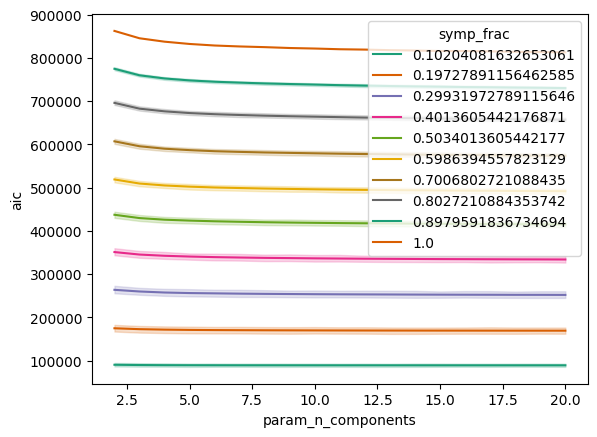

In [20]:
#sns.lineplot(data=results, x='param_n_components', y='aic',
#             palette='Dark2')

# lineplot with separate lines for each value of 'symp_frac'
sns.lineplot(data=results, x='param_n_components', y='aic',
             hue='symp_frac', palette='Dark2')

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


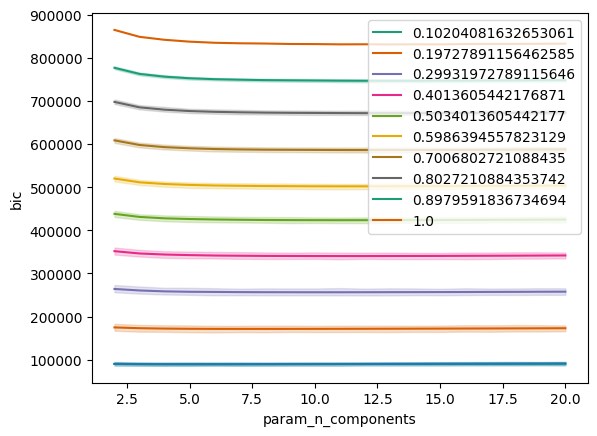

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


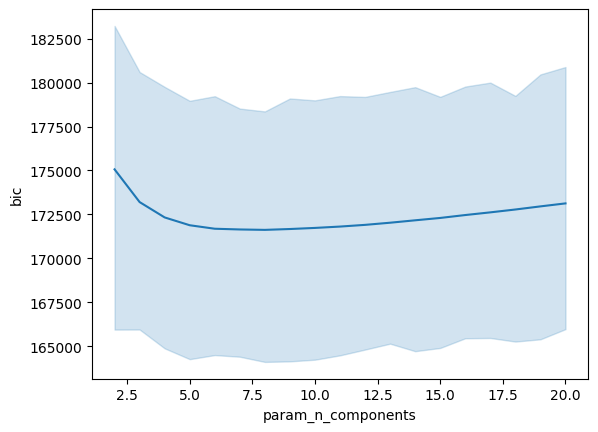

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


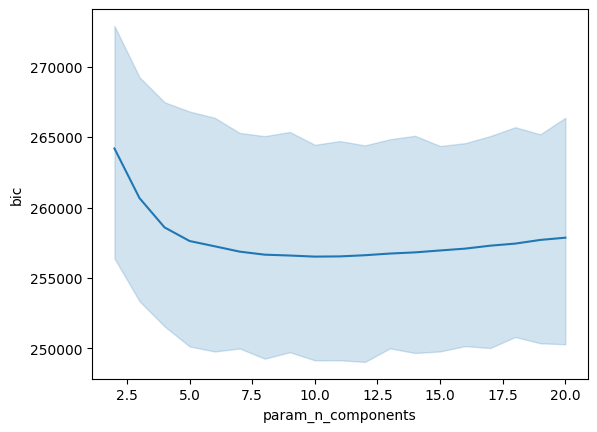

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


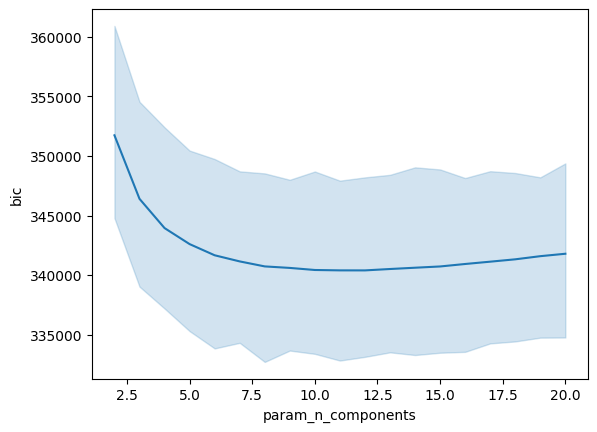

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


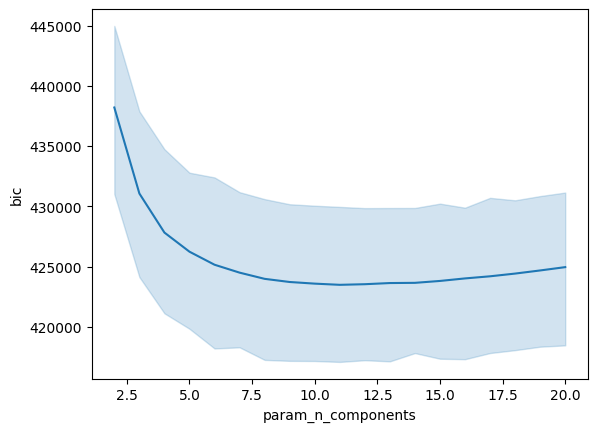

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


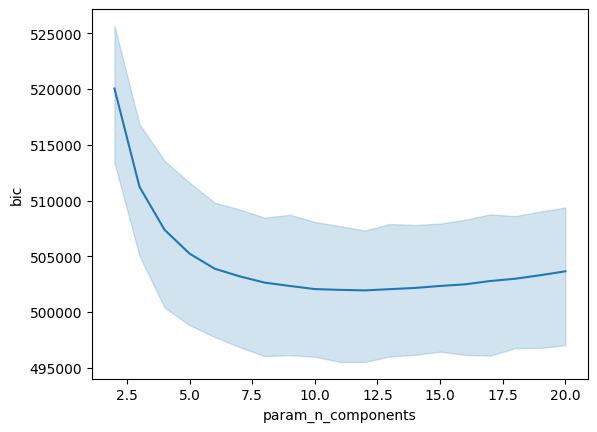

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


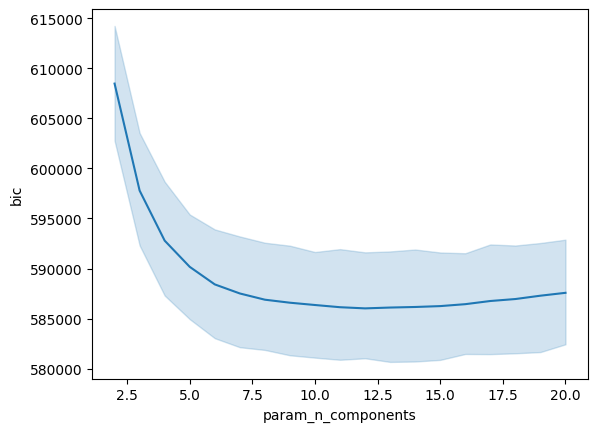

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


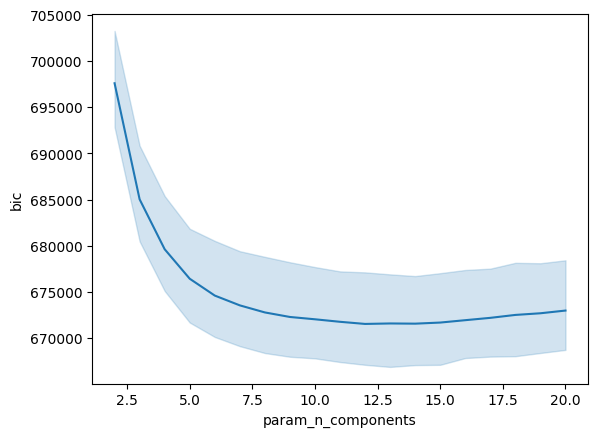

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


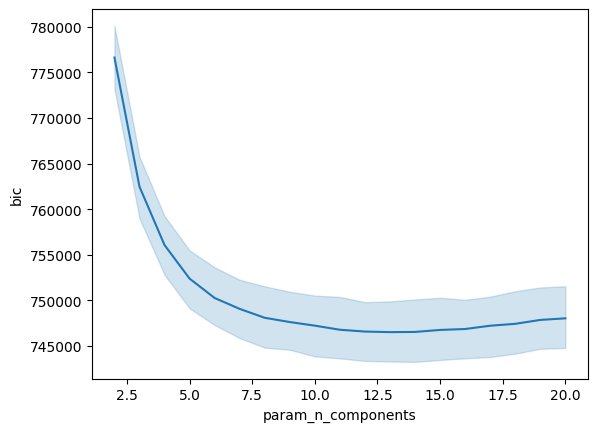

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4168/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


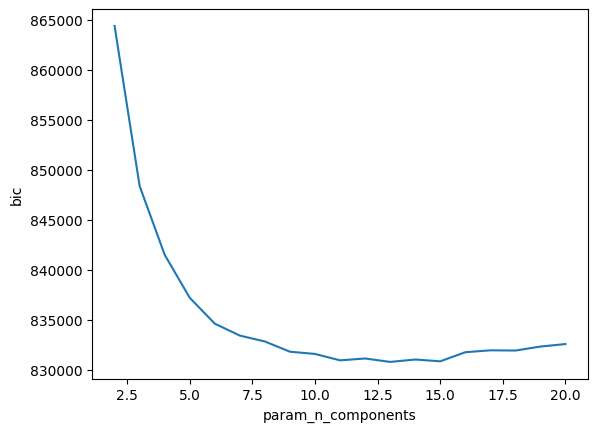

In [21]:
sns.lineplot(data=results, x='param_n_components', y='bic',
            palette='Dark2',hue='symp_frac') 

# plot separate line plots for each symp_frac value
for i in results['symp_frac'].unique():
    sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',
             palette='Dark2')
    plt.show()

In [22]:
results['bic']

0        96589.977909
1        87383.128644
2       103505.394118
3        90412.579951
4        93319.558138
            ...      
1553    742898.929219
1554    743488.944252
1555    743353.321417
1556    754810.202362
1557    832593.310989
Name: bic, Length: 1558, dtype: float64

In [24]:
# print the row of results with the lowest bic for each symp_frac value
for i in results['symp_frac'].unique():
#    print(results[results['symp_frac']==i].iloc[results[results['symp_frac']==i]['bic'].idxmin()])
    for j in results['orig_index'].unique():
        print(results[results['symp_frac']==i])


#results.iloc[results['bic'].idxmin()]
# need to splitby the orig_index 

      param_n_components            aic            bic  symp_frac  orig_index
0                      2   96382.133198   96589.977909   0.102041           0
1                      2   87175.283933   87383.128644   0.102041           1
2                      2  103297.549406  103505.394118   0.102041           2
3                      2   90204.735239   90412.579951   0.102041           3
4                      2   93111.713427   93319.558138   0.102041           4
...                  ...            ...            ...        ...         ...
1480                  20   92469.156190   94607.945318   0.102041           4
1481                  20   87421.227557   89560.016685   0.102041           5
1482                  20   85853.675295   87992.464423   0.102041           6
1483                  20   79206.063351   81344.852479   0.102041           7
1484                  20   86553.428040   88692.217168   0.102041           8

[171 rows x 5 columns]
      param_n_components            aic 

In [86]:
# for each value of symp_frac in results return the row with the lowest bic
bestfits = results.groupby(['symp_frac','orig_index'])['bic'].idxmin().reset_index()

In [89]:
bestfits = results.loc[bestfits['bic']]

In [83]:
ncomps_best = {}
for sympfrac in results['symp_frac'].unique():
    for idx in results['orig_index'].unique():
        res = results[results['symp_frac']== sympfrac]
        res = res[res['orig_index']==idx]
        if len(res) > 0:
            ncomps_best[(sympfrac,idx)] =  res.loc[res['bic'].idxmin(),'param_n_components']


In [93]:
bestfits.groupby('symp_frac')['param_n_components'].mean()

# plot this as a scatter, probably? ideally with error for each / or just plot all the points

symp_frac
0.102041     4.888889
0.197279     7.444444
0.299320    10.333333
0.401361    10.333333
0.503401    11.333333
0.598639    11.555556
0.700680    12.444444
0.802721    12.555556
0.897959    12.666667
1.000000    13.000000
Name: param_n_components, dtype: float64

In [70]:
len(results['symp_frac'].unique()) * len(results['orig_index'].unique()) 

820

<Axes: xlabel='symp_frac'>

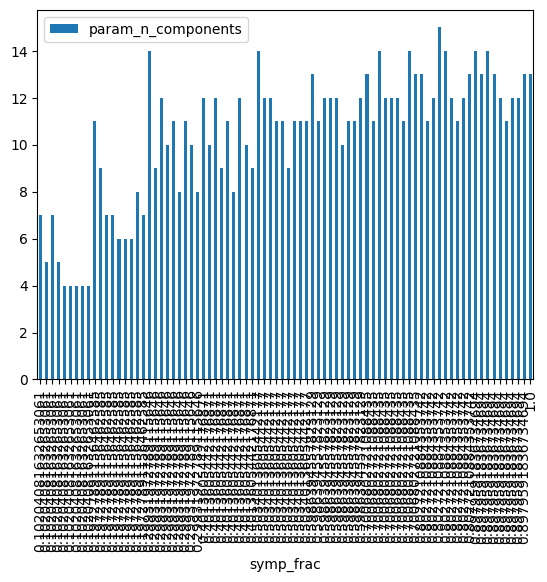

In [91]:
bestfits.plot.bar(x='symp_frac', y='param_n_components')